In [1]:
# 500 Cities Data Analysis - basic code
# Written by Michelle Schmitz, originally in Jupyter notebooks and then in Python code.
# Initially written on 02 March 2019, updated on 02 December 2019

In [2]:
# Importing in pandas and numpy libraries to handle data management aspects of the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

pd.set_option('max_columns', 50)
%matplotlib inline

In [3]:
### Reading in the 500 Cities data set, created by the CDC's Division of Population Health (2018 release)

## This is the original dataset's link:
# read.csv("https://catalog.data.gov/dataset/500-cities-local-data-for-better-health-b32fd/resource/8a49a1f7-4fcc-49a6-acb5-fcd3c0796782")

url = ('https://data.cdc.gov/api/views/6vp6-wxuq/rows.csv')

data_500_cities = pd.read_csv(url)
data_500_cities.head(3)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2015,MI,Michigan,Warren,City,BRFSS,Health Outcomes,2684000,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,35.6,35.5,35.8,NaN,NaN,134056,"(42.4934233034, -83.0270075248)",HLTHOUT,BPHIGH,2684000.0,NaN,High Blood Pressure
1,2015,FL,Florida,Tampa,City,BRFSS,Prevention,1271000,Cholesterol screening among adults aged >=18 Y...,%,CrdPrv,Crude prevalence,73.7,73.5,73.9,NaN,NaN,335709,"(27.996198041, -82.4450349799)",PREVENT,CHOLSCREEN,1271000.0,NaN,Cholesterol Screening
2,2015,CA,California,Antioch,Census Tract,BRFSS,Health Outcomes,0602252-06013355110,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,23.9,23.1,24.7,NaN,NaN,4197,"(37.9678839606, -121.769273216)",HLTHOUT,BPHIGH,602252.0,6.013355e+09,High Blood Pressure


In [4]:
# checking the first state as well
data_500_cities[data_500_cities.StateAbbr == 'AL'].head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
85,2015,AL,Alabama,Montgomery,City,BRFSS,Health Outcomes,0151000,High blood pressure among adults aged >=18 Years,%,AgeAdjPrv,Age-adjusted prevalence,40.8,40.6,41.0,NaN,NaN,205764,"(32.3472645333, -86.2677059552)",HLTHOUT,BPHIGH,151000.0,NaN,High Blood Pressure
121,2015,AL,Alabama,Hoover,Census Tract,BRFSS,Health Outcomes,0135896-01117030217,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,36.1,34.4,37.9,NaN,NaN,4878,"(33.4384217583, -86.6382002523)",HLTHOUT,BPHIGH,135896.0,1.117030e+09,High Blood Pressure
311,2015,AL,Alabama,Birmingham,Census Tract,BRFSS,Health Outcomes,0107000-01073005903,High cholesterol among adults aged >=18 Years ...,%,CrdPrv,Crude prevalence,39.9,39.0,40.9,NaN,NaN,4933,"(33.597162309, -86.6766736351)",HLTHOUT,HIGHCHOL,107000.0,1.073006e+09,High Cholesterol
401,2015,AL,Alabama,Montgomery,Census Tract,BRFSS,Health Outcomes,0151000-01101002800,High blood pressure among adults aged >=18 Years,%,CrdPrv,Crude prevalence,41.1,39.7,42.4,NaN,NaN,4220,"(32.3348190958, -86.2525307261)",HLTHOUT,BPHIGH,151000.0,1.101003e+09,High Blood Pressure
456,2015,AL,Alabama,Huntsville,Census Tract,BRFSS,Health Outcomes,0137000-01089002921,High cholesterol among adults aged >=18 Years ...,%,CrdPrv,Crude prevalence,39.4,38.2,40.8,NaN,NaN,6224,"(34.6092624615, -86.5553843441)",HLTHOUT,HIGHCHOL,137000.0,1.089003e+09,High Cholesterol


In [5]:
# doing more specific descriptive checks for all of the data - and the numeric data in particular
data_500_cities.info() #basic information about the dataset
data_500_cities.dtypes
data_500_cities.describe() #descriptive statistics for all numeric variables - including FIPS codes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810103 entries, 0 to 810102
Data columns (total 24 columns):
Year                          810103 non-null int64
StateAbbr                     810103 non-null object
StateDesc                     810103 non-null object
CityName                      810047 non-null object
GeographicLevel               810103 non-null object
DataSource                    810103 non-null object
Category                      810103 non-null object
UniqueID                      810103 non-null object
Measure                       810103 non-null object
Data_Value_Unit               810103 non-null object
DataValueTypeID               810103 non-null object
Data_Value_Type               810103 non-null object
Data_Value                    787311 non-null float64
Low_Confidence_Limit          787311 non-null float64
High_Confidence_Limit         787311 non-null float64
Data_Value_Footnote_Symbol    22794 non-null object
Data_Value_Footnote           22794 non-

,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,CityFIPS,TractFIPS
count,810103.000000,787311.000000,787311.000000,787311.000000,8.101030e+05,8.100470e+05,7.820470e+05
mean,2015.856779,31.224884,29.488202,32.979995,3.202413e+04,2.606307e+06,2.592907e+10
std,0.350299,25.815357,25.341553,26.245761,2.568489e+06,1.686183e+06,1.675378e+10
min,2015.000000,0.200000,0.100000,0.200000,1.000000e+00,1.500300e+04,1.073000e+09
25%,2016.000000,9.800000,8.700000,11.000000,2.405000e+03,6.813440e+05,8.001009e+09
50%,2016.000000,22.800000,20.500000,25.100000,3.632000e+03,2.622000e+06,2.608100e+10
75%,2016.000000,46.000000,43.100000,49.200000,5.040000e+03,4.055000e+06,4.010911e+10
max,2016.000000,95.500000,94.100000,96.500000,3.087455e+08,5.613900e+06,5.602100e+10


In [6]:
# Examining categorical values of Measures variable, creating series object
Col_Measure = ['CityName','StateAbbr','DataValueTypeID','Measure','Data_Value','Low_Confidence_Limit','High_Confidence_Limit','CityFIPS','TractFIPS','PopulationCount','GeoLocation','UniqueID'] 
print(Col_Measure)

['CityName', 'StateAbbr', 'DataValueTypeID', 'Measure', 'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'CityFIPS', 'TractFIPS', 'PopulationCount', 'GeoLocation', 'UniqueID']


In [7]:
# Pivot for Age-Adjusted Prevalence (updated)
pivot1 = pd.pivot_table(data_500_cities[Col_Measure][(data_500_cities.DataValueTypeID == 'AgeAdjPrv') & (data_500_cities.StateAbbr == 'US')], values=['Low_Confidence_Limit','Data_Value','High_Confidence_Limit'], index='Measure', margins=False, dropna=False, aggfunc={'Low_Confidence_Limit': np.mean, 'Data_Value': np.mean,'High_Confidence_Limit': np.mean})
pivot1

,Data_Value,High_Confidence_Limit,Low_Confidence_Limit
Measure,,,
All teeth lost among adults aged >=65 Years,15.0,15.4,14.6
Arthritis among adults aged >=18 Years,23.0,23.2,22.8
Binge drinking among adults aged >=18 Years,18.0,18.2,17.7
Cancer (excluding skin cancer) among adults aged >=18 Years,5.9,6.0,5.8
Cholesterol screening among adults aged >=18 Years,75.2,75.5,74.9
Chronic kidney disease among adults aged >=18 Years,2.7,2.8,2.6
Chronic obstructive pulmonary disease among adults aged >=18 Years,6.0,6.1,5.8
Coronary heart disease among adults aged >=18 Years,5.8,5.9,5.7
Current asthma among adults aged >=18 Years,8.8,9.0,8.7


In [8]:
# Pivot for Crude Prevalence (updated)
pivot2 = pd.pivot_table(data_500_cities[Col_Measure][(data_500_cities.DataValueTypeID == 'CrdPrv') & (data_500_cities.StateAbbr == 'US')], values=['Low_Confidence_Limit','Data_Value','High_Confidence_Limit'], index='Measure', margins=False, dropna=False, aggfunc={'Low_Confidence_Limit': np.mean, 'Data_Value': np.mean,'High_Confidence_Limit': np.mean})
pivot2
#print(pivot2)

,Data_Value,High_Confidence_Limit,Low_Confidence_Limit
Measure,,,
All teeth lost among adults aged >=65 Years,14.5,14.9,14.1
Arthritis among adults aged >=18 Years,25.4,25.6,25.1
Binge drinking among adults aged >=18 Years,16.9,17.2,16.7
Cancer (excluding skin cancer) among adults aged >=18 Years,6.6,6.7,6.4
Cholesterol screening among adults aged >=18 Years,77.0,77.3,76.7
Chronic kidney disease among adults aged >=18 Years,2.9,3.0,2.9
Chronic obstructive pulmonary disease among adults aged >=18 Years,6.5,6.6,6.4
Coronary heart disease among adults aged >=18 Years,6.6,6.7,6.5
Current asthma among adults aged >=18 Years,8.9,9.0,8.7


In [9]:
# Want to display the data for US overall, and averaged for all counties together

## pivot 1

#converting pivot table back into another data frame to display data together
flattened1 = pd.DataFrame(pivot1.to_records())
with_new_index1 = flattened1.set_index('Measure')
with_new_index1.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.AgeAdjPrv').replace('High_Confidence_Limit','High_CL.AgeAdjPrv').replace('Data_Value','Data_Value.AgeAdjPrv') \
                           for hdr in with_new_index1.columns]
with_new_index1

## pivot 2

#converting back into another data frame to display data together
flattened2 = pd.DataFrame(pivot2.to_records())
with_new_index2 = flattened2.set_index('Measure')
with_new_index2.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.CrdPrv').replace('High_Confidence_Limit','High_CL.CrdPrv').replace('Data_Value','Data_Value.CrdPrv') \
                           for hdr in with_new_index2.columns]

with_new_index2

,Data_Value.CrdPrv,High_CL.CrdPrv,Low_CL.CrdPrv
Measure,,,
All teeth lost among adults aged >=65 Years,14.5,14.9,14.1
Arthritis among adults aged >=18 Years,25.4,25.6,25.1
Binge drinking among adults aged >=18 Years,16.9,17.2,16.7
Cancer (excluding skin cancer) among adults aged >=18 Years,6.6,6.7,6.4
Cholesterol screening among adults aged >=18 Years,77.0,77.3,76.7
Chronic kidney disease among adults aged >=18 Years,2.9,3.0,2.9
Chronic obstructive pulmonary disease among adults aged >=18 Years,6.5,6.6,6.4
Coronary heart disease among adults aged >=18 Years,6.6,6.7,6.5
Current asthma among adults aged >=18 Years,8.9,9.0,8.7


In [10]:
# Joining 2 pivot tables together in case if I want to output larger table
# Dropping a good reference on different types of joins here -- http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/

US_data_table = pd.merge(with_new_index1, with_new_index2, on='Measure', how='outer')
US_data_table
US_data_table_ft = pd.DataFrame(US_data_table.to_records())
US_data_table_ft

,Measure,Data_Value.AgeAdjPrv,High_CL.AgeAdjPrv,Low_CL.AgeAdjPrv,Data_Value.CrdPrv,High_CL.CrdPrv,Low_CL.CrdPrv
0,All teeth lost among adults aged >=65 Years,15.0,15.4,14.6,14.5,14.9,14.1
1,Arthritis among adults aged >=18 Years,23.0,23.2,22.8,25.4,25.6,25.1
2,Binge drinking among adults aged >=18 Years,18.0,18.2,17.7,16.9,17.2,16.7
3,Cancer (excluding skin cancer) among adults ag...,5.9,6.0,5.8,6.6,6.7,6.4
4,Cholesterol screening among adults aged >=18 Y...,75.2,75.5,74.9,77.0,77.3,76.7
5,Chronic kidney disease among adults aged >=18 ...,2.7,2.8,2.6,2.9,3.0,2.9
6,Chronic obstructive pulmonary disease among ad...,6.0,6.1,5.8,6.5,6.6,6.4
7,Coronary heart disease among adults aged >=18 ...,5.8,5.9,5.7,6.6,6.7,6.5
8,Current asthma among adults aged >=18 Years,8.8,9.0,8.7,8.9,9.0,8.7
9,Current lack of health insurance among adults ...,14.6,14.9,14.3,11.6,11.8,11.3


In [11]:
# Reordering columns so that it makes sense in a comparison framework
US_data_table_index = US_data_table_ft.set_index('Measure')
US_data_table_ro = US_data_table_index[['Low_CL.CrdPrv','Data_Value.CrdPrv','High_CL.CrdPrv','Low_CL.AgeAdjPrv','Data_Value.AgeAdjPrv','High_CL.AgeAdjPrv']]
US_data_table_ro

,Low_CL.CrdPrv,Data_Value.CrdPrv,High_CL.CrdPrv,Low_CL.AgeAdjPrv,Data_Value.AgeAdjPrv,High_CL.AgeAdjPrv
Measure,,,,,,
All teeth lost among adults aged >=65 Years,14.1,14.5,14.9,14.6,15.0,15.4
Arthritis among adults aged >=18 Years,25.1,25.4,25.6,22.8,23.0,23.2
Binge drinking among adults aged >=18 Years,16.7,16.9,17.2,17.7,18.0,18.2
Cancer (excluding skin cancer) among adults aged >=18 Years,6.4,6.6,6.7,5.8,5.9,6.0
Cholesterol screening among adults aged >=18 Years,76.7,77.0,77.3,74.9,75.2,75.5
Chronic kidney disease among adults aged >=18 Years,2.9,2.9,3.0,2.6,2.7,2.8
Chronic obstructive pulmonary disease among adults aged >=18 Years,6.4,6.5,6.6,5.8,6.0,6.1
Coronary heart disease among adults aged >=18 Years,6.5,6.6,6.7,5.7,5.8,5.9
Current asthma among adults aged >=18 Years,8.7,8.9,9.0,8.7,8.8,9.0


In [12]:
# Now that I've presented the data in a nice-to-see way for the entire US - let's see what the distribution is of
# the PREVALENCES (both CRUDE and AGE-ADJUSTED) for all cities (n=500)

In [13]:
# Getting ALL PREVALENCES for all observations that ARE NOT the US summary (i.e., not summed across US)
DF_Prev = data_500_cities[Col_Measure][(data_500_cities.StateAbbr != 'US')] 
DF_Prev

## However, we need to know how many observations are in each grouping; age-adjusted prevalences are demographically adjusted based on age distributions from each crude population!
DF_Prev.groupby('DataValueTypeID').groups

{'AgeAdjPrv': Int64Index([    15,     21,     42,     55,     59,     60,     62,     76,
                 82,     85,
             ...
             809683, 809896, 809915, 809924, 809960, 809972, 810049, 810059,
             810061, 810083],
            dtype='int64', length=14000),
 'CrdPrv': Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                  8,      9,
             ...
             810093, 810094, 810095, 810096, 810097, 810098, 810099, 810100,
             810101, 810102],
            dtype='int64', length=796047)}

In [14]:
# I will split the prevalences dataset into crude and age-adjusted prevalences, before splitting them further 
# into each measure and recombining them. This reshapes the dataset so each Measure will have its own column,
# making it easier to compare across measures for future analyses.

In [15]:
## Recoding Measure into MeasureShort

conditions = [
    (DF_Prev['Measure'] == 'All teeth lost among adults aged >=65 Years'),
    (DF_Prev['Measure'] == 'Arthritis among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Binge drinking among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Cancer (excluding skin cancer) among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Cholesterol screening among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Chronic kidney disease among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Chronic obstructive pulmonary disease among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Coronary heart disease among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Current asthma among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Current lack of health insurance among adults aged 18–64 Years'),
    (DF_Prev['Measure'] == 'Current smoking among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Diagnosed diabetes among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50–75 Years'),
    (DF_Prev['Measure'] == 'High blood pressure among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years'),
    (DF_Prev['Measure'] == 'Mammography use among women aged 50–74 Years'),
    (DF_Prev['Measure'] == 'Mental health not good for >=14 days among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'No leisure-time physical activity among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Obesity among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Older adult men aged >=65 Years who are up to date on a core set of clinical preventive services: Flu shot past Year, PPV shot ever, Colorectal cancer screening'),
    (DF_Prev['Measure'] == 'Older adult women aged >=65 Years who are up to date on a core set of clinical preventive services: Flu shot past Year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 Years'),
    (DF_Prev['Measure'] == 'Papanicolaou smear use among adult women aged 21–65 Years'),
    (DF_Prev['Measure'] == 'Physical health not good for >=14 days among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Sleeping less than 7 hours among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Stroke among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Taking medicine for high blood pressure control among adults aged >=18 Years with high blood pressure'),
    (DF_Prev['Measure'] == 'Visits to dentist or dental clinic among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Visits to doctor for routine checkup within the past Year among adults aged >=18 Years')
     ]

choices = [
    'TeethLost', 'Arthritis', 'BngDrnk', 'Cancer', 'Cholesterol', 'KidneyDis', 'COPD', 
    'CHD', 'Asthma', 'NoHlthIns', 'CurrSmoke', 'Diabetes','FecBldTst', 'HighBP', 'HighChol',
    'Mammo', 'MentHlth', 'NoPhysAct', 'Obesity', 'OlderMen', 'OlderWomen', 'PapSmear', 
    'PhysHlthBad', 'SleepLittle', 'Stroke', 'HtnMeds', 'DentalVisits', 'DocVisits'
    ]

DF_Prev['Measure_Short'] = np.select(conditions, choices)

#print(DF_Prev)

In [16]:
choices #checking list of choices before we go further

['TeethLost',
 'Arthritis',
 'BngDrnk',
 'Cancer',
 'Cholesterol',
 'KidneyDis',
 'COPD',
 'CHD',
 'Asthma',
 'NoHlthIns',
 'CurrSmoke',
 'Diabetes',
 'FecBldTst',
 'HighBP',
 'HighChol',
 'Mammo',
 'MentHlth',
 'NoPhysAct',
 'Obesity',
 'OlderMen',
 'OlderWomen',
 'PapSmear',
 'PhysHlthBad',
 'SleepLittle',
 'Stroke',
 'HtnMeds',
 'DentalVisits',
 'DocVisits']

In [17]:
# Cross-tab to check the outputs of my shortened measure variable
pd.crosstab(DF_Prev['Measure'],DF_Prev['Measure_Short'])

DF_Prev.head()

,CityName,StateAbbr,DataValueTypeID,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,CityFIPS,TractFIPS,PopulationCount,GeoLocation,UniqueID,Measure_Short
0,Warren,MI,CrdPrv,High blood pressure among adults aged >=18 Years,35.6,35.5,35.8,2684000.0,NaN,134056,"(42.4934233034, -83.0270075248)",2684000,HighBP
1,Tampa,FL,CrdPrv,Cholesterol screening among adults aged >=18 Y...,73.7,73.5,73.9,1271000.0,NaN,335709,"(27.996198041, -82.4450349799)",1271000,Cholesterol
2,Antioch,CA,CrdPrv,High blood pressure among adults aged >=18 Years,23.9,23.1,24.7,602252.0,6.013355e+09,4197,"(37.9678839606, -121.769273216)",0602252-06013355110,HighBP
3,Amarillo,TX,CrdPrv,High blood pressure among adults aged >=18 Years,30.1,29.0,31.2,4803000.0,4.837501e+10,4155,"(35.2020640999, -101.85672259)",4803000-48375011500,HighBP
4,Albuquerque,NM,CrdPrv,High blood pressure among adults aged >=18 Years,19.0,18.1,19.8,3502000.0,3.500100e+10,4932,"(35.0792833587, -106.612735412)",3502000-35001001700,HighBP


In [18]:
# Getting the CRUDE PREVALENCE for all observations that ARE NOT the US summary
DF_CrdPrev = DF_Prev[(DF_Prev.DataValueTypeID == 'CrdPrv')]
DF_CrdPrev

,CityName,StateAbbr,DataValueTypeID,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,CityFIPS,TractFIPS,PopulationCount,GeoLocation,UniqueID,Measure_Short
0,Warren,MI,CrdPrv,High blood pressure among adults aged >=18 Years,35.6,35.5,35.8,2684000.0,NaN,134056,"(42.4934233034, -83.0270075248)",2684000,HighBP
1,Tampa,FL,CrdPrv,Cholesterol screening among adults aged >=18 Y...,73.7,73.5,73.9,1271000.0,NaN,335709,"(27.996198041, -82.4450349799)",1271000,Cholesterol
2,Antioch,CA,CrdPrv,High blood pressure among adults aged >=18 Years,23.9,23.1,24.7,602252.0,6.013355e+09,4197,"(37.9678839606, -121.769273216)",0602252-06013355110,HighBP
3,Amarillo,TX,CrdPrv,High blood pressure among adults aged >=18 Years,30.1,29.0,31.2,4803000.0,4.837501e+10,4155,"(35.2020640999, -101.85672259)",4803000-48375011500,HighBP
4,Albuquerque,NM,CrdPrv,High blood pressure among adults aged >=18 Years,19.0,18.1,19.8,3502000.0,3.500100e+10,4932,"(35.0792833587, -106.612735412)",3502000-35001001700,HighBP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
810098,Colorado Springs,CO,CrdPrv,Chronic obstructive pulmonary disease among ad...,5.4,4.6,6.2,816000.0,8.041008e+09,3995,"(38.8877735095, -104.841285791)",0816000-08041008000,COPD
810099,Nashville,TN,CrdPrv,Diagnosed diabetes among adults aged >=18 Years,10.7,10.2,11.3,4752006.0,4.703701e+10,2952,"(36.2652149217, -86.7586096067)",4752006-47037010901,Diabetes
810100,Longmont,CO,CrdPrv,Older adult men aged >=65 Years who are up to ...,42.0,35.1,48.4,845970.0,8.013013e+09,5755,"(40.1813756943, -105.142750762)",0845970-08013013208,OlderMen
810101,Hesperia,CA,CrdPrv,Visits to doctor for routine checkup within th...,62.1,61.1,63.1,633434.0,6.071010e+09,8172,"(34.3980889724, -117.390144758)",0633434-06071010017,DocVisits


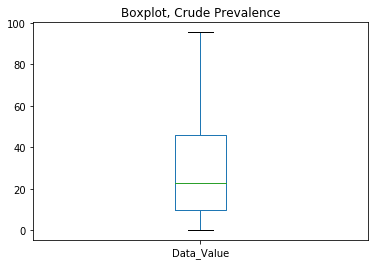

In [19]:
# Boxplot of crude prevalences

fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot, Crude Prevalence')
pd.DataFrame(DF_CrdPrev.Data_Value).boxplot(grid=False)

In [20]:
# Getting the AGE-ADJUSTED PREVALENCE for all observations that ARE NOT the US summary
DF_AgeAdjPrev = DF_Prev[(DF_Prev.DataValueTypeID == 'AgeAdjPrv')]
DF_AgeAdjPrev

,CityName,StateAbbr,DataValueTypeID,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,CityFIPS,TractFIPS,PopulationCount,GeoLocation,UniqueID,Measure_Short
15,Youngstown,OH,AgeAdjPrv,Cholesterol screening among adults aged >=18 Y...,68.9,68.5,69.4,3988000.0,NaN,66982,"(41.0993286607, -80.6463187081)",3988000,Cholesterol
21,Centennial,CO,AgeAdjPrv,High blood pressure among adults aged >=18 Years,23.2,23.0,23.5,812815.0,NaN,100377,"(39.592872073, -104.867986891)",0812815,HighBP
42,Fort Worth,TX,AgeAdjPrv,High blood pressure among adults aged >=18 Years,32.4,32.3,32.5,4827000.0,NaN,741206,"(32.780192804, -97.3470323225)",4827000,HighBP
55,Reno,NV,AgeAdjPrv,High blood pressure among adults aged >=18 Years,27.7,27.5,27.8,3260600.0,NaN,225221,"(39.5540171998, -119.852733516)",3260600,HighBP
59,Muncie,IN,AgeAdjPrv,High blood pressure among adults aged >=18 Years,35.5,35.1,35.8,1851876.0,NaN,70085,"(40.1987098324, -85.3942940148)",1851876,HighBP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
809972,Baldwin Park,CA,AgeAdjPrv,Binge drinking among adults aged >=18 Years,15.1,14.9,15.2,603666.0,NaN,75390,"(34.082871519, -117.972100918)",0603666,BngDrnk
810049,Santa Rosa,CA,AgeAdjPrv,Current asthma among adults aged >=18 Years,9.2,9.1,9.3,670098.0,NaN,167815,"(38.4464423102, -122.706005935)",0670098,Asthma
810059,Corona,CA,AgeAdjPrv,Stroke among adults aged >=18 Years,2.7,2.6,2.7,616350.0,NaN,152374,"(33.8623571787, -117.564224471)",0616350,Stroke
810061,Rochester,NY,AgeAdjPrv,No leisure-time physical activity among adults...,33.3,33.0,33.6,3663000.0,NaN,210565,"(43.1679802918, -77.6162348882)",3663000,NoPhysAct


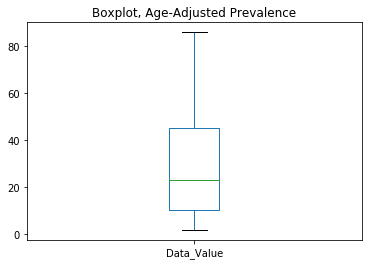

In [21]:
# BOXPLOT OF AGE-ADJUSTED PREVALENCE (adjusted based on all of the crude prevalences) - for all causes grouped together
fig2, ax2 = plt.subplots()
ax2.set_title('Boxplot, Age-Adjusted Prevalence')
#pd.DataFrame(DF_AgeAdjPrev_ft.Data_Value).boxplot(grid=False)
pd.DataFrame(DF_AgeAdjPrev.Data_Value).boxplot(grid=False)

In [22]:
## Breaking up the CRUDE PREVALENCES dataset by each measure grouping
measure_groups = DF_CrdPrev.groupby('Measure_Short').groups
measure_groups

{'Arthritis': Int64Index([111207, 111222, 111226, 111227, 111232, 111239, 111249, 111267,
             111269, 111298,
             ...
             809916, 809920, 809947, 809963, 809964, 809976, 810010, 810054,
             810067, 810082],
            dtype='int64', length=28504),
 'Asthma': Int64Index([111220, 111223, 111224, 111244, 111263, 111271, 111303, 111306,
             111350, 111385,
             ...
             809888, 809909, 809910, 809913, 809928, 810011, 810017, 810024,
             810034, 810044],
            dtype='int64', length=28504),
 'BngDrnk': Int64Index([111225, 111250, 111270, 111292, 111295, 111301, 111320, 111322,
             111326, 111366,
             ...
             809919, 809997, 810008, 810013, 810048, 810060, 810063, 810072,
             810095, 810096],
            dtype='int64', length=28504),
 'CHD': Int64Index([111191, 111216, 111260, 111397, 111401, 111486, 111626, 111659,
             111661, 111765,
             ...
             809763,

In [23]:
# Getting keys of the dataset (so we can break the datasets up appropriately)
gb = DF_CrdPrev.groupby('Measure_Short')
gb.groups.keys()

dict_keys(['Arthritis', 'Asthma', 'BngDrnk', 'CHD', 'COPD', 'Cancer', 'Cholesterol', 'CurrSmoke', 'DentalVisits', 'Diabetes', 'DocVisits', 'FecBldTst', 'HighBP', 'HighChol', 'HtnMeds', 'KidneyDis', 'Mammo', 'MentHlth', 'NoHlthIns', 'NoPhysAct', 'Obesity', 'OlderMen', 'OlderWomen', 'PapSmear', 'PhysHlthBad', 'SleepLittle', 'Stroke', 'TeethLost'])

In [24]:
# If I was better at Python, I'd basically do a FOR loop for the above set of Dict Keys, 
# to basically run the set of commands that would break up each dataset, rename some columns and read them
# to the entire dataset. 

# However, I've only given myself a day to write up this analysis, and I'm out of practice.

# I will revisit the FOR loop idea at a later date.

In [25]:
# I wanted to see the distributions of the 28 variables.
# Could make paneled histograms, but boxplots and other measures could be interesting too.

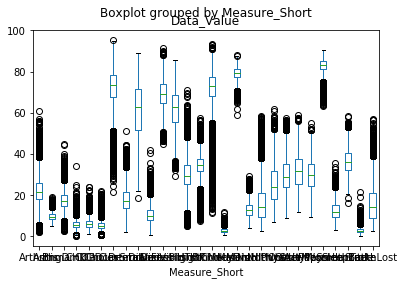

In [26]:
# Pandas boxplot
DF_CrdPrev.boxplot(by='Measure_Short', 
                       column=['Data_Value'], 
                       grid=False)

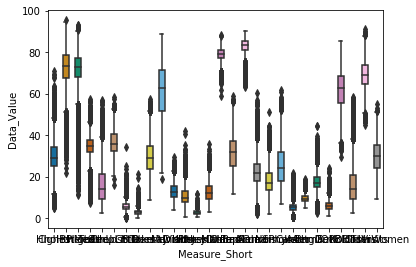

In [27]:
# Seaborn boxplot to add extra colors into it
sns.boxplot(y='Data_Value', x='Measure_Short', 
                 data=DF_CrdPrev, 
                 width=0.5,
                 palette="colorblind")

In [28]:
# # Boxplots weren't helpful, and the axes did not leave much to be seen.
# # I decided to try to do a paneled histogram, to see if we could see approximate distributions.
# # I was still interested in comparisons, though...

# #link 1: https://realpython.com/python-histograms/
# #link 2: https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

# #fig, axes = plt.subplots(nrows=2, ncols=2)
# #ax0, ax1, ax2, ax3 = axes.flatten()

# # Set up the plot
# #ax = plt.subplot(14, 2, Measure_i) #set it up to be a very long, very narrow plot
# # fig = plt.figure()
# # fig.subplots_adjust(hspace=0.4, wspace=0.4)
                    
# for Measure_i in range(1, 28):

# #     fig = plt.figure()
# #     fig.subplots_adjust(hspace=0.4, wspace=0.4)

#     # Subset to the Measure of interest
#     subset = DF_CrdPrev[DF_CrdPrev['Measure_Short'] == Measure_i]

#     fig, ax = plt.subplots(14, 2, sharex='col', sharey='row')

#     # Draw the plot
#     ax.hist(subset['Data_Value'], bins = 10,
#              color = 'blue', edgecolor = 'black', label = Measure_i)
    
#     # Title and labels
# #    ax.set_title('Histogram', size = 10)
#     ax.set_xlabel('Prevalence (per 100,000)', size = 10)
#     ax.set_ylabel('Flights', size= 10)

# #plt.tight_layout()
# plt.show()

In [29]:
#Looking at the list of keys - as we have 28 variables, we can't use all variables in one graphic.
list(gb.groups.keys()) 

['Arthritis',
 'Asthma',
 'BngDrnk',
 'CHD',
 'COPD',
 'Cancer',
 'Cholesterol',
 'CurrSmoke',
 'DentalVisits',
 'Diabetes',
 'DocVisits',
 'FecBldTst',
 'HighBP',
 'HighChol',
 'HtnMeds',
 'KidneyDis',
 'Mammo',
 'MentHlth',
 'NoHlthIns',
 'NoPhysAct',
 'Obesity',
 'OlderMen',
 'OlderWomen',
 'PapSmear',
 'PhysHlthBad',
 'SleepLittle',
 'Stroke',
 'TeethLost']

In [30]:
## Boxplots aren't helpful (surprise - there's 28 variables, with a lot of overlap!)
# So, I'm creating a density plot of all of our measures to see what the relative densities are.

# Remember: PREVALENCE is a measure of the population (new and current cases, per 100,000)
# Density here measures the number of CENSUS TRACTS that have a certain prevalence.

# idea taken from https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0, 0.5, 'Density')

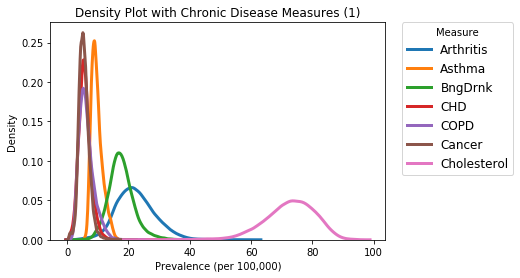

In [31]:
# List of first 7 indicators to plot
Measures_Plot1 = ['Arthritis','Asthma','BngDrnk','CHD','COPD','Cancer','Cholesterol']

# Iterate through the indicators
for Measure_i in Measures_Plot1:
    subset = DF_CrdPrev[DF_CrdPrev['Measure_Short'] == Measure_i]  # subset to measure of interest
 
    # Draw the density plot
    sns.distplot(subset['Data_Value'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = Measure_i)
    
plt.legend(prop={'size': 12}, title = 'Measure',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Density Plot with Chronic Disease Measures (1)')
plt.xlabel('Prevalence (per 100,000)')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

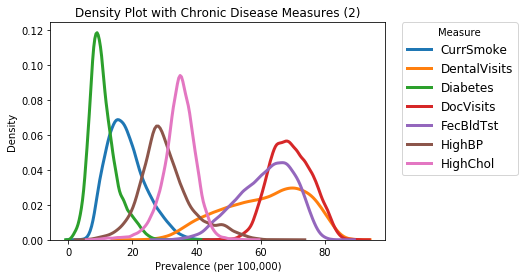

In [32]:
# List of second 7 indicators to plot
Measures_Plot2 = ['CurrSmoke','DentalVisits','Diabetes','DocVisits','FecBldTst','HighBP','HighChol']

# Iterate through the indicators
for Measure_i in Measures_Plot2:
    # Subset to the Measure of interest
    subset = DF_CrdPrev[DF_CrdPrev['Measure_Short'] == Measure_i]
    
    # Draw the density plot
    sns.distplot(subset['Data_Value'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = Measure_i)
    
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Measure',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Density Plot with Chronic Disease Measures (2)')
plt.xlabel('Prevalence (per 100,000)')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

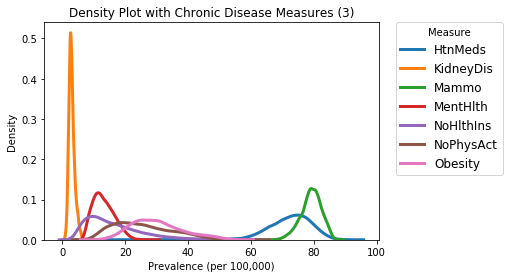

In [33]:
# List of third 7 indicators to plot
Measures_Plot3 = ['HtnMeds','KidneyDis','Mammo','MentHlth','NoHlthIns','NoPhysAct','Obesity']

# Iterate through the indicators
for Measure_i in Measures_Plot3:
    # Subset to the Measure of interest
    subset = DF_CrdPrev[DF_CrdPrev['Measure_Short'] == Measure_i]
    
    # Draw the density plot
    sns.distplot(subset['Data_Value'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = Measure_i)
    
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Measure',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Density Plot with Chronic Disease Measures (3)')
plt.xlabel('Prevalence (per 100,000)')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

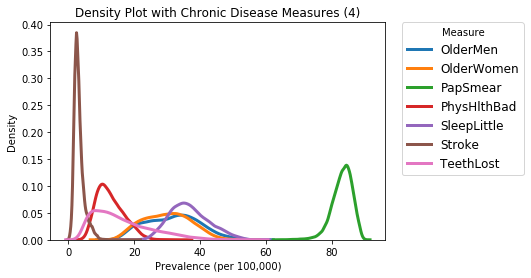

In [34]:
# List of last 7 indicators to plot
Measures_Plot4 = ['OlderMen','OlderWomen','PapSmear','PhysHlthBad','SleepLittle','Stroke','TeethLost']

# Iterate through the indicators
for Measure_i in Measures_Plot4:
    # Subset to the Measure of interest
    subset = DF_CrdPrev[DF_CrdPrev['Measure_Short'] == Measure_i]
    
    # Draw the density plot
    sns.distplot(subset['Data_Value'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = Measure_i)
    
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Measure',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Density Plot with Chronic Disease Measures (4)')
plt.xlabel('Prevalence (per 100,000)')
plt.ylabel('Density')


WHAT DOES THE ABOVE ANALYSIS TELL US?

A lot of census tracts are reporting a low prevalence of many chronic conditions, such as CHD, stroke, and diabetes (i.e., high density at a very low prevalence).

Obviously, the indicators with much higher prevalences are those that affect larger swathes of the population such as mammograms and Pap smears (for women), dental visits and doctor's visits (ideally for the entire population).

However, there were some outcomes I was intrigued in - sleeping little, Pap smears, hypertension meds, and cholesterol - that I want to map out. We know there are spatial relationships to some of these indicators - especially here in the south, where there are worse health outcomes overall.

The 500 Cities project, would play well with my interests in spatial epidemiology - investigating the effects of place upon health outcomes.

So, I decided to reshape my dataset, so each indicator's census tract was a distinct row and each measure had its own column. I figured this would play better with the mapping capabilities found in Geopandas, Pandas, and MatPlotLib

Link:
https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

In [35]:
# Below is my code to reshape a dataset so I had more control over the columns - if I was creating a dataset for analysis.

In [36]:
# Revising this at a later date, until I get the code iteration right.

# ## Creating a function to iterate upon each of the columns, and rename columns, based on each of the group names.

def create_group_index(gb, group_name, col_grps):
  def transform_column(c):
    c = c.replace('Low_Confidence_Limit', 'Low_CL.' + group_name)
    c = c.replace('High_Confidence_Limit', 'High_CL.' + group_name)
    c = c.replace('Data_Value', 'Data_Value.' + group_name)
    return c

    group = gb.get_group(group_name)[col_grps]
    index = group.set_index('UniqueID')
    index.columns = [transform_column(c) for c in index.columns]
    return index.head()

#group_names = ['Arthritis', 'Asthma', 'BngDrnk']
group_names = list(gb.groups.keys()) 
#group_dict = {g: create_group_index(g) for g in group_names}
group_dict = {g: create_group_index(g) for g in choices}

TypeError: create_group_index() missing 2 required positional arguments: 'group_name' and 'col_grps'

In [37]:
#Splitting dataset into seperate instances to process - this can be done better with the function mentioned above, but
# until I finally include this properly, the data will be manually split.

Arthritis = gb.get_group('Arthritis')
Arthritis.drop(columns=['Measure']) #Measure used to be specific to each measure - we're outputting data, so not necessary
Arthritis.head()

,CityName,StateAbbr,DataValueTypeID,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,CityFIPS,TractFIPS,PopulationCount,GeoLocation,UniqueID,Measure_Short
111207,Evansville,IN,CrdPrv,Arthritis among adults aged >=18 Years,31.3,31.1,31.5,1822000.0,NaN,117429,"(37.9867158026, -87.538270731)",1822000,Arthritis
111222,Omaha,NE,CrdPrv,Arthritis among adults aged >=18 Years,23.4,21.9,25.0,3137000.0,3.105501e+10,2391,"(41.254772101, -96.2480280318)",3137000-31055007509,Arthritis
111226,Irving,TX,CrdPrv,Arthritis among adults aged >=18 Years,22.1,21.3,23.0,4837000.0,4.811301e+10,3695,"(32.8316428717, -96.9854340232)",4837000-48113014405,Arthritis
111227,Toledo,OH,CrdPrv,Arthritis among adults aged >=18 Years,29.2,28.2,30.4,3977000.0,3.909500e+10,3676,"(41.6974993277, -83.5595336414)",3977000-39095000400,Arthritis
111232,Houston,TX,CrdPrv,Arthritis among adults aged >=18 Years,24.0,22.8,25.3,4835000.0,4.820145e+10,2941,"(29.7782117663, -95.6347894861)",4835000-48201450500,Arthritis


In [38]:
# Changing the index variable and starting to rename variables.
Arthritis_index = Arthritis.set_index('UniqueID')
Arthritis_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.Arthritis').replace('High_Confidence_Limit','High_CL.Arthritis').replace('Data_Value','Data_Value.Arthritis').replace('PopulationCount','PopCount') \
                           for hdr in Arthritis_index.columns]
Arthritis_index.head()
Arthritis = Arthritis_index

#check to make sure I removed Arthritis index correctly
#del Arthritis_index
Arthritis
Arthritis_index

,CityName,StateAbbr,DataValueTypeID,Measure,Data_Value.Arthritis,Low_CL.Arthritis,High_CL.Arthritis,CityFIPS,TractFIPS,PopCount,GeoLocation,Measure_Short
UniqueID,,,,,,,,,,,,
1822000,Evansville,IN,CrdPrv,Arthritis among adults aged >=18 Years,31.3,31.1,31.5,1822000.0,NaN,117429,"(37.9867158026, -87.538270731)",Arthritis
3137000-31055007509,Omaha,NE,CrdPrv,Arthritis among adults aged >=18 Years,23.4,21.9,25.0,3137000.0,3.105501e+10,2391,"(41.254772101, -96.2480280318)",Arthritis
4837000-48113014405,Irving,TX,CrdPrv,Arthritis among adults aged >=18 Years,22.1,21.3,23.0,4837000.0,4.811301e+10,3695,"(32.8316428717, -96.9854340232)",Arthritis
3977000-39095000400,Toledo,OH,CrdPrv,Arthritis among adults aged >=18 Years,29.2,28.2,30.4,3977000.0,3.909500e+10,3676,"(41.6974993277, -83.5595336414)",Arthritis
4835000-48201450500,Houston,TX,CrdPrv,Arthritis among adults aged >=18 Years,24.0,22.8,25.3,4835000.0,4.820145e+10,2941,"(29.7782117663, -95.6347894861)",Arthritis
...,...,...,...,...,...,...,...,...,...,...,...,...
0666000-06073008311,San Diego,CA,CrdPrv,Arthritis among adults aged >=18 Years,23.5,22.1,25.1,666000.0,6.073008e+09,2884,"(32.8253213887, -117.263325683)",Arthritis
0455000-04013111502,Phoenix,AZ,CrdPrv,Arthritis among adults aged >=18 Years,22.1,21.2,22.9,455000.0,4.013112e+09,6524,"(33.4746608986, -112.020205548)",Arthritis
5613900-56021001200,Cheyenne,WY,CrdPrv,Arthritis among adults aged >=18 Years,26.7,25.2,28.3,5613900.0,5.602100e+10,4638,"(41.1792673506, -104.838572685)",Arthritis


In [39]:
## All other indicators will only have Unique Identifiers and the CLs and Data Values Attached to Them

Col_Grps = ['Low_Confidence_Limit','High_Confidence_Limit','Data_Value','UniqueID'] 
print(Col_Grps)

#List: 'Asthma', 'BngDrnk', 'CHD', 'COPD', 'Cancer', 'Cholesterol', 'CurrSmoke', 'DentalVisits', 'Diabetes', 'DocVisits', 'FecBldTst', 'HighBP', 'HighChol', 'HtnMeds', 'KidneyDis', 'Mammo', 'MentHlth', 'NoHlthIns', 'NoPhysAct', 'Obesity', 'OlderMen', 'OlderWomen', 'PapSmear', 'PhysHlthBad', 'SleepLittle', 'Stroke', 'TeethLost']

['Low_Confidence_Limit', 'High_Confidence_Limit', 'Data_Value', 'UniqueID']


In [40]:
#Asthma
Asthma = gb.get_group('Asthma')[Col_Grps]
Asthma.head()
Asthma_index = Asthma.set_index('UniqueID')
Asthma_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.Asthma').replace('High_Confidence_Limit','High_CL.Asthma').replace('Data_Value','Data_Value.Asthma') \
                           for hdr in Asthma_index.columns]
Asthma_index.head()
#Asthma = Asthma_index

,Low_CL.Asthma,High_CL.Asthma,Data_Value.Asthma
UniqueID,,,
0644000-06037212620,7.4,8.2,7.8
0151000-01101002700,7.7,8.6,8.1
15003000200,8.4,9.0,8.7
3651000-36005022702,10.6,12.3,11.4
4805000-48453001753,6.6,7.5,6.9


In [42]:
#Binge Drinking
BngDrnk = gb.get_group('BngDrnk')[Col_Grps]
#BngDrnk.head()
BngDrnk_index = BngDrnk.set_index('UniqueID')
BngDrnk_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.BngDrnk').replace('High_Confidence_Limit','High_CL.BngDrnk').replace('Data_Value','Data_Value.BngDrnk') \
                           for hdr in BngDrnk_index.columns]
BngDrnk_index.head()
#BngDrnk = BngDrnk_index

,Low_CL.BngDrnk,High_CL.BngDrnk,Data_Value.BngDrnk
UniqueID,,,
4865000-48029171401,16.2,18.0,17.1
3651000-36047099600,17.6,19.0,18.3
1271000,17.8,18.0,17.9
3651000-36047089200,14.1,15.4,14.8
4842508-48121021735,23.7,25.8,24.8


In [43]:
#CHD
CHD = gb.get_group('CHD')[Col_Grps]
#CHD.head()
CHD_index = CHD.set_index('UniqueID')
CHD_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.CHD').replace('High_Confidence_Limit','High_CL.CHD').replace('Data_Value','Data_Value.CHD') \
                           for hdr in CHD_index.columns]
CHD_index.head()
#CHD = CHD_index

,Low_CL.CHD,High_CL.CHD,Data_Value.CHD
UniqueID,,,
2621000-26163574300,5.9,7.2,6.5
3651000-36005023703,5.1,6.1,5.6
2622000-26163542800,6.0,7.5,6.7
5303180-53033029902,4.7,5.6,5.1
5135000-51650010313,4.5,5.2,4.8


In [44]:
#COPD
COPD = gb.get_group('COPD')[Col_Grps]
#COPD.head()
COPD_index = COPD.set_index('UniqueID')
COPD_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.COPD').replace('High_Confidence_Limit','High_CL.COPD').replace('Data_Value','Data_Value.COPD') \
                           for hdr in COPD_index.columns]
COPD_index.head()
#COPD = COPD_index

,Low_CL.COPD,High_CL.COPD,Data_Value.COPD
UniqueID,,,
4835000-48201454502,2.3,3.3,2.7
4835000,5.6,5.7,5.6
0658072,5.1,5.4,5.2
1304000-13121009603,2.8,3.9,3.3
1232000-12011091201,5.8,7.1,6.4


In [45]:
#Cancer
Cancer = gb.get_group('Cancer')[Col_Grps]
#Cancer.head()
Cancer_index = Cancer.set_index('UniqueID')
Cancer_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.Cancer').replace('High_Confidence_Limit','High_CL.Cancer').replace('Data_Value','Data_Value.Cancer') \
                           for hdr in Cancer_index.columns]
Cancer_index.head()
#Cancer = Cancer_index

,Low_CL.Cancer,High_CL.Cancer,Data_Value.Cancer
UniqueID,,,
3912000-39151701200,7.6,8.6,8.1
2758000-27123030400,4.2,4.5,4.3
0666000-06073008359,3.3,3.5,3.4
4805000-48453002403,4.5,4.8,4.6
3651000-36047044800,7.3,8.1,7.7


In [46]:
#Cholesterol
Cholesterol = gb.get_group('Cholesterol')[Col_Grps]
#Cholesterol.head()
Cholesterol_index = Cholesterol.set_index('UniqueID')
Cholesterol_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.Cholesterol').replace('High_Confidence_Limit','High_CL.Cholesterol').replace('Data_Value','Data_Value.Cholesterol') \
                           for hdr in Cholesterol_index.columns]
Cholesterol_index.head()
#Cholesterol = Cholesterol_index

,Low_CL.Cholesterol,High_CL.Cholesterol,Data_Value.Cholesterol
UniqueID,,,
1271000,73.5,73.9,73.7
0623182-06095252310,83.9,86.0,85.1
3410000-34007601600,66.2,71.3,68.7
4876000-48309001900,38.4,48.8,43.9
2621000-26163573800,60.7,67.0,63.7


In [47]:
#Current Smoking
CurrSmoke = gb.get_group('CurrSmoke')[Col_Grps]
#CurrSmoke.head()
CurrSmoke_index = CurrSmoke.set_index('UniqueID')
CurrSmoke_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.CurrSmoke').replace('High_Confidence_Limit','High_CL.CurrSmoke').replace('Data_Value','Data_Value.CurrSmoke') \
                           for hdr in CurrSmoke_index.columns]
CurrSmoke_index.head()
#CurrSmoke = CurrSmoke_index

,Low_CL.CurrSmoke,High_CL.CurrSmoke,Data_Value.CurrSmoke
UniqueID,,,
3651000-36005026500,15.2,19.9,17.5
0668378-06013345116,7.9,11.8,9.7
3918000-39049002300,29.3,33.9,31.5
3502000-35001003724,9.3,13.4,11.3
0667000-06075010400,7.6,11.8,9.4


In [48]:
#Dental Visits
DentalVisits = gb.get_group('DentalVisits')[Col_Grps]
#DentalVisits.head()
DentalVisits_index = DentalVisits.set_index('UniqueID')
DentalVisits_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.DentalVisits').replace('High_Confidence_Limit','High_CL.DentalVisits').replace('Data_Value','Data_Value.DentalVisits') \
                           for hdr in DentalVisits_index.columns]
DentalVisits_index.head()
#DentalVisits = DentalVisits_index

,Low_CL.DentalVisits,High_CL.DentalVisits,Data_Value.DentalVisits
UniqueID,,,
2255000-22071012700,65.7,73.1,69.7
4075000-40143008300,50.5,55.6,53.0
0908000-09001071900,51.0,56.0,53.5
0615044-06037541603,35.8,41.9,38.7
0816000-08041007601,70.4,78.3,74.8


In [49]:
#Diabetes
Diabetes = gb.get_group('Diabetes')[Col_Grps]
#Diabetes.head()
Diabetes_index = Diabetes.set_index('UniqueID')
Diabetes_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.Diabetes').replace('High_Confidence_Limit','High_CL.Diabetes').replace('Data_Value','Data_Value.Diabetes') \
                           for hdr in Diabetes_index.columns]
Diabetes_index.head()
#Diabetes = Diabetes_index

,Low_CL.Diabetes,High_CL.Diabetes,Data_Value.Diabetes
UniqueID,,,
0477000-04019002501,12.8,13.9,13.3
0681204-06001440305,10.1,11.5,10.8
2270000-22017024601,18.8,21.1,19.9
1973335-19193000300,8.3,9.9,9.1
4835000-48201423402,11.3,13.0,12.1


In [50]:
# Doctor's Visits
DocVisits = gb.get_group('DocVisits')[Col_Grps]
#DocVisits.head()
DocVisits_index = DocVisits.set_index('UniqueID')
DocVisits_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.DocVisits').replace('High_Confidence_Limit','High_CL.DocVisits').replace('Data_Value','Data_Value.DocVisits') \
                           for hdr in DocVisits_index.columns]
DocVisits_index.head()
#DocVisits = DocVisits_index

,Low_CL.DocVisits,High_CL.DocVisits,Data_Value.DocVisits
UniqueID,,,
2743000-27053001700,65.4,66.8,66.1
3651000-36047011000,65.8,67.6,66.7
4023200-40109108109,70.8,72.6,71.8
0662000-06065042300,61.7,63.7,62.7
4055000-40109107221,68.2,69.4,68.8


In [51]:
#Fecal Blood Tests
FecBldTst = gb.get_group('FecBldTst')[Col_Grps]
#FecBldTst.head()
FecBldTst_index = FecBldTst.set_index('UniqueID')
FecBldTst_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.FecBldTst').replace('High_Confidence_Limit','High_CL.FecBldTst').replace('Data_Value','Data_Value.FecBldTst') \
                           for hdr in FecBldTst_index.columns]
FecBldTst_index.head()
#FecBldTst = FecBldTst_index

,Low_CL.FecBldTst,High_CL.FecBldTst,Data_Value.FecBldTst
UniqueID,,,
4819000-48113008701,42.9,51.2,47.0
0535710-05031000900,54.0,61.9,58.0
4810768-48061980100,NaN,NaN,NaN
0477000-04019004114,NaN,NaN,NaN
0973000-09001020600,72.9,77.7,75.5


In [52]:
# High Blood Pressures
HighBP = gb.get_group('HighBP')[Col_Grps]
#HighBP.head()
HighBP_index = HighBP.set_index('UniqueID')
HighBP_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.HighBP').replace('High_Confidence_Limit','High_CL.HighBP').replace('Data_Value','Data_Value.HighBP') \
                           for hdr in HighBP_index.columns]
HighBP_index.head()
#HighBP = HighBP_index

,Low_CL.HighBP,High_CL.HighBP,Data_Value.HighBP
UniqueID,,,
2684000,35.5,35.8,35.6
0602252-06013355110,23.1,24.7,23.9
4803000-48375011500,29.0,31.2,30.1
3502000-35001001700,18.1,19.8,19.0
4967000-49035100800,24.0,26.2,25.1


In [53]:
# High Cholesterol
HighChol = gb.get_group('HighChol')[Col_Grps]
#HighChol.head()
HighChol_index = HighChol.set_index('UniqueID')
HighChol_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.HighChol').replace('High_Confidence_Limit','High_CL.HighChol').replace('Data_Value','Data_Value.HighChol') \
                           for hdr in HighChol_index.columns]
HighChol_index.head()
#HighChol = HighChol_index

,Low_CL.HighChol,High_CL.HighChol,Data_Value.HighChol
UniqueID,,,
3502000-35001000204,34.8,36.2,35.5
4260000-42101033400,38.1,40.5,39.3
4164900-41047002301,30.6,33.2,31.9
2148006-21111011706,40.8,43.2,42.0
4835000-48157672601,NaN,NaN,NaN


In [54]:
#Hypertension Medication
HtnMeds = gb.get_group('HtnMeds')[Col_Grps]
#HtnMeds.head()
HtnMeds_index = HtnMeds.set_index('UniqueID')
HtnMeds_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.HtnMeds').replace('High_Confidence_Limit','High_CL.HtnMeds').replace('Data_Value','Data_Value.HtnMeds') \
                           for hdr in HtnMeds_index.columns]
HtnMeds_index.head()
#HtnMeds = HtnMeds_index

,Low_CL.HtnMeds,High_CL.HtnMeds,Data_Value.HtnMeds
UniqueID,,,
0624638-06067008508,61.9,64.4,63.1
1919000-19163012901,74.8,77.0,75.9
0622804-06073020105,67.6,69.8,68.7
1253000-12095014605,81.5,83.4,82.5
3651000-36081112300,70.3,72.4,71.4


In [55]:
#Kidney Disease
KidneyDis = gb.get_group('KidneyDis')[Col_Grps]
#KidneyDis.head()
KidneyDis_index = KidneyDis.set_index('UniqueID')
KidneyDis_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.KidneyDis').replace('High_Confidence_Limit','High_CL.KidneyDis').replace('Data_Value','Data_Value.KidneyDis') \
                           for hdr in KidneyDis_index.columns]
KidneyDis_index.head()
#KidneyDis = KidneyDis_index

,Low_CL.KidneyDis,High_CL.KidneyDis,Data_Value.KidneyDis
UniqueID,,,
4876000-48309002302,3.3,3.7,3.5
2686000,3.0,3.1,3.0
3651000-36047117400,2.9,3.2,3.1
3651000-36081015801,3.0,3.2,3.1
4810768,4.0,4.1,4.0


In [56]:
#Mammograms
Mammo = gb.get_group('Mammo')[Col_Grps]
#Mammo.head()
Mammo_index = Mammo.set_index('UniqueID')
Mammo_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.Mammo').replace('High_Confidence_Limit','High_CL.Mammo').replace('Data_Value','Data_Value.Mammo') \
                           for hdr in Mammo_index.columns]
Mammo_index.head()
#Mammo = Mammo_index

,Low_CL.Mammo,High_CL.Mammo,Data_Value.Mammo
UniqueID,,,
1921000-19153004602,74.6,80.7,77.9
4856000,73.9,75.1,74.5
3651000-36005003900,77.2,83.2,80.2
5363000-53033006700,77.0,82.1,80.0
4858016-48085031642,75.1,81.7,78.7


In [57]:
#Mental Health
MentHlth = gb.get_group('MentHlth')[Col_Grps]
#MentHlth.head()
MentHlth_index = MentHlth.set_index('UniqueID')
MentHlth_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.MentHlth').replace('High_Confidence_Limit','High_CL.MentHlth').replace('Data_Value','Data_Value.MentHlth') \
                           for hdr in MentHlth_index.columns]
MentHlth_index.head()
#MentHlth = MentHlth_index

,Low_CL.MentHlth,High_CL.MentHlth,Data_Value.MentHlth
UniqueID,,,
4260000-42101033800,12.1,14.2,13.2
3916000-39035101102,10.1,12.8,11.4
4752006-47037010702,17.5,19.9,18.7
3712000-37119005521,10.3,13.0,11.6
0427820-04013616000,9.7,12.4,11.0


In [58]:
#No Health Insurance
NoHlthIns = gb.get_group('NoHlthIns')[Col_Grps]
#NoHlthIns.head()
NoHlthIns_index = NoHlthIns.set_index('UniqueID')
NoHlthIns_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.NoHlthIns').replace('High_Confidence_Limit','High_CL.NoHlthIns').replace('Data_Value','Data_Value.NoHlthIns') \
                           for hdr in NoHlthIns_index.columns]
NoHlthIns_index.head()
#NoHlthIns = NoHlthIns_index

,Low_CL.NoHlthIns,High_CL.NoHlthIns,Data_Value.NoHlthIns
UniqueID,,,
0664000-06067007016,9.3,12.0,10.6
0664000-06067006202,14.3,17.5,15.8
0636770-06059052522,4.9,7.0,5.9
0636770,6.4,7.0,6.6
1714000-17031520400,21.4,30.0,25.6


In [59]:
# No Physical Activity
NoPhysAct = gb.get_group('NoPhysAct')[Col_Grps]
#NoPhysAct.head()
NoPhysAct_index = NoPhysAct.set_index('UniqueID')
NoPhysAct_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.NoPhysAct').replace('High_Confidence_Limit','High_CL.NoPhysAct').replace('Data_Value','Data_Value.NoPhysAct') \
                           for hdr in NoPhysAct_index.columns]
NoPhysAct_index.head()
#NoPhysAct = NoPhysAct_index

,Low_CL.NoPhysAct,High_CL.NoPhysAct,Data_Value.NoPhysAct
UniqueID,,,
1772000-17167000600,33.0,37.2,35.1
2507000-25025010103,12.5,18.7,15.7
5553000-55079013600,34.8,40.8,37.7
4740000,26.4,27.4,26.9
0644000-06037228100,28.5,34.2,31.5


In [60]:
# Obesity
Obesity = gb.get_group('Obesity')[Col_Grps]
#Obesity.head()
Obesity_index = Obesity.set_index('UniqueID')
Obesity_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.Obesity').replace('High_Confidence_Limit','High_CL.Obesity').replace('Data_Value','Data_Value.Obesity') \
                           for hdr in Obesity_index.columns]
Obesity_index.head()
#Obesity = Obesity_index

,Low_CL.Obesity,High_CL.Obesity,Data_Value.Obesity
UniqueID,,,
5303180-53033031205,23.8,25.9,24.8
0446000-04013421202,27.8,30.2,29.0
5414600-54039000100,46.2,48.7,47.5
0804000-08005081500,15.9,19.4,17.6
4819000-48113010801,37.7,40.1,39.1


In [61]:
# Tests for Older Men
OlderMen = gb.get_group('OlderMen')[Col_Grps]
#OlderMen.head()
OlderMen_index = OlderMen.set_index('UniqueID')
OlderMen_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.OlderMen').replace('High_Confidence_Limit','High_CL.OlderMen').replace('Data_Value','Data_Value.OlderMen') \
                           for hdr in OlderMen_index.columns]
OlderMen_index.head()
#OlderMen = OlderMen_index

,Low_CL.OlderMen,High_CL.OlderMen,Data_Value.OlderMen
UniqueID,,,
3918000-39049003600,17.9,27.3,22.6
0647766-06085504507,29.9,38.4,34.1
0644000-06037109100,25.5,35.8,30.4
3977000-39095004800,20.1,29.9,24.9
3774440-37129010800,24.1,32.9,28.4


In [62]:
# Tests for Older Women
OlderWomen = gb.get_group('OlderWomen')[Col_Grps]
#OlderWomen.head()
OlderWomen_index = OlderWomen.set_index('UniqueID')
OlderWomen_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.OlderWomen').replace('High_Confidence_Limit','High_CL.OlderWomen').replace('Data_Value','Data_Value.OlderWomen') \
                           for hdr in OlderWomen_index.columns]
OlderWomen_index.head()
#OlderWomen = OlderWomen_index

,Low_CL.OlderWomen,High_CL.OlderWomen,Data_Value.OlderWomen
UniqueID,,,
0151000-01101002500,22.4,31.3,26.7
0606000-06001421300,37.4,46.6,42.3
2915670,36.9,40.1,38.4
4819000-48113008200,26.2,36.3,31.1
4260000-42101009300,18.8,27.4,23.1


In [63]:
# Pap Smears
PapSmear = gb.get_group('PapSmear')[Col_Grps]
#PapSmear.head()
PapSmear_index = PapSmear.set_index('UniqueID')
PapSmear_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.PapSmear').replace('High_Confidence_Limit','High_CL.PapSmear').replace('Data_Value','Data_Value.PapSmear') \
                           for hdr in PapSmear_index.columns]
PapSmear_index.head()
#PapSmear = PapSmear_index

,Low_CL.PapSmear,High_CL.PapSmear,Data_Value.PapSmear
UniqueID,,,
4810768,81.2,82.4,81.8
3710740,86.2,86.9,86.5
1369000-13051010802,NaN,NaN,NaN
1212875,77.9,79.0,78.4
3673000-36067001800,80.4,85.6,83.1


In [64]:
# Physical Health is Bad
PhysHlthBad = gb.get_group('PhysHlthBad')[Col_Grps]
#PhysHlthBad.head()
PhysHlthBad_index = PhysHlthBad.set_index('UniqueID')
PhysHlthBad_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.PhysHlthBad').replace('High_Confidence_Limit','High_CL.PhysHlthBad').replace('Data_Value','Data_Value.PhysHlthBad') \
                           for hdr in PhysHlthBad_index.columns]
PhysHlthBad_index.head()
#PhysHlthBad = PhysHlthBad_index

,Low_CL.PhysHlthBad,High_CL.PhysHlthBad,Data_Value.PhysHlthBad
UniqueID,,,
5182000-51810046006,9.0,11.2,10.1
0651182,8.5,9.0,8.8
4967000-49035104800,7.7,10.1,8.9
2146027-21067003404,15.8,19.3,17.5
4819000-48113013611,7.2,9.2,8.1


In [65]:
# Sleep litle (less than 7 hrs, day)
SleepLittle = gb.get_group('SleepLittle')[Col_Grps]
#SleepLittle.head()
SleepLittle_index = SleepLittle.set_index('UniqueID')
SleepLittle_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.SleepLittle').replace('High_Confidence_Limit','High_CL.SleepLittle').replace('Data_Value','Data_Value.SleepLittle') \
                           for hdr in SleepLittle_index.columns]
SleepLittle_index.head()
#SleepLittle = SleepLittle_index

,Low_CL.SleepLittle,High_CL.SleepLittle,Data_Value.SleepLittle
UniqueID,,,
2938000-29047020902,35.2,38.2,36.8
0455000-04013112503,39.9,42.3,41.2
1369000-13051000900,29.0,32.5,30.7
4075000-40143003100,29.5,32.1,30.7
0667000-06075015900,29.0,31.0,30.0


In [66]:
# Stroke
Stroke = gb.get_group('Stroke')[Col_Grps]
#Stroke.head()
Stroke_index = Stroke.set_index('UniqueID')
Stroke_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.Stroke').replace('High_Confidence_Limit','High_CL.Stroke').replace('Data_Value','Data_Value.Stroke') \
                           for hdr in Stroke_index.columns]
Stroke_index.head()
#Stroke = Stroke_index

,Low_CL.Stroke,High_CL.Stroke,Data_Value.Stroke
UniqueID,,,
5553000-55079009700,2.4,3.0,2.7
3651000-36047032300,3.1,4.0,3.6
4261000-42003980900,2.2,2.8,2.5
3456550-34031175703,3.2,3.9,3.5
0150000-01097002700,6.0,7.4,6.6


In [67]:
# Population with Missing Teeth
TeethLost = gb.get_group('TeethLost')[Col_Grps]
#TeethLost.head()
TeethLost_index = TeethLost.set_index('UniqueID')
TeethLost_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.TeethLost').replace('High_Confidence_Limit','High_CL.TeethLost').replace('Data_Value','Data_Value.TeethLost') \
                           for hdr in TeethLost_index.columns]
TeethLost_index.head()
#TeethLost = TeethLost_index

,Low_CL.TeethLost,High_CL.TeethLost,Data_Value.TeethLost
UniqueID,,,
1714000-17031271800,31.8,49.1,40.5
0454050-04013610000,NaN,NaN,NaN
3719000-37063000700,8.8,17.2,12.7
3006550,12.6,15.5,14.0
2148006,18.0,19.1,18.5


In [68]:
## https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

In [69]:
## Time to merge all of the datasets together into one big dataset (but I know it's going to be a lot of intermediates!)
# There might be an easier way of doing this in Python, but I'm out of practice enough not to think about it.
# Also, really jetlagged. :D

#'Arthritis_index', 'Asthma_index', 'BngDrnk_index', 'CHD_index', 'COPD_index', 'Cancer_index', 'Cholesterol_index', 'CurrSmoke_index', 'DentalVisits_index', 'Diabetes_index', 'DocVisits_index', 'FecBldTst_index', 'HighBP_index', 'HighChol_index', 'HtnMeds_index', 'KidneyDis_index', 'Mammo_index', 'MentHlth_index', 'NoHlthIns_index', 'NoPhysAct_index', 'Obesity_index', 'OlderMen_index', 'OlderWomen_index', 'PapSmear_index', 'PhysHlthBad_index', 'SleepLittle_index', 'Stroke_index', 'TeethLost_index' 

int_table1 = pd.merge(Arthritis_index, Asthma_index, on='UniqueID', how='outer')
#int_table1

int_table2 = pd.merge(int_table1, BngDrnk_index, on='UniqueID', how='outer')
#int_table2

del int_table1 #deleting previous intermediary as I go to save memory

int_table3 = pd.merge(int_table2, CHD_index, on='UniqueID', how='outer')
#int_table3

del int_table2 #deleting previous intermediary as I go to save memory

int_table4 = pd.merge(int_table3, COPD_index, on='UniqueID', how='outer')
#int_table4

del int_table3 #deleting previous intermediary as I go to save memory

int_table5 = pd.merge(int_table4, Cancer_index, on='UniqueID', how='outer')
#int_table5

del int_table4 #deleting previous intermediary as I go to save memory

int_table6 = pd.merge(int_table5, Cholesterol_index, on='UniqueID', how='outer')
#int_table6

del int_table5 #deleting previous intermediary as I go to save memory

int_table7 = pd.merge(int_table6, CurrSmoke_index, on='UniqueID', how='outer')
#int_table7

del int_table6 #deleting previous intermediary as I go to save memory

int_table8 = pd.merge(int_table7, DentalVisits_index, on='UniqueID', how='outer')
#int_table8

del int_table7 #deleting previous intermediary as I go to save memory

int_table9 = pd.merge(int_table8, Diabetes_index, on='UniqueID', how='outer')
#int_table9

del int_table8 #deleting previous intermediary as I go to save memory

int_table10 = pd.merge(int_table9, DocVisits_index, on='UniqueID', how='outer')
#int_table10

del int_table9 #deleting previous intermediary as I go to save memory

int_table11 = pd.merge(int_table10, FecBldTst_index, on='UniqueID', how='outer')
#int_table11

del int_table10 #deleting previous intermediary as I go to save memory

int_table12 = pd.merge(int_table11, HighBP_index, on='UniqueID', how='outer')
#int_table12

del int_table11 #deleting previous intermediary as I go to save memory

int_table13 = pd.merge(int_table12, HighChol_index, on='UniqueID', how='outer')
#int_table13

del int_table12 #deleting previous intermediary as I go to save memory

int_table14 = pd.merge(int_table13, HtnMeds_index, on='UniqueID', how='outer')
#int_table14

del int_table13 #deleting previous intermediary as I go to save memory

int_table15 = pd.merge(int_table14, KidneyDis_index, on='UniqueID', how='outer')
#int_table15

del int_table14 #deleting previous intermediary as I go to save memory

int_table16 = pd.merge(int_table15, Mammo_index, on='UniqueID', how='outer')
#int_table16

del int_table15 #deleting previous intermediary as I go to save memory

int_table17 = pd.merge(int_table16, MentHlth_index, on='UniqueID', how='outer')
#int_table17

del int_table16 #deleting previous intermediary as I go to save memory

int_table18 = pd.merge(int_table17, NoHlthIns_index, on='UniqueID', how='outer')
#int_table18

del int_table17 #deleting previous intermediary as I go to save memory

int_table19 = pd.merge(int_table18, NoPhysAct_index, on='UniqueID', how='outer')
#int_table19

del int_table18 #deleting previous intermediary as I go to save memory

int_table20 = pd.merge(int_table19, Obesity_index, on='UniqueID', how='outer')
#int_table20

del int_table19 #deleting previous intermediary as I go to save memory

int_table21 = pd.merge(int_table20, OlderMen_index, on='UniqueID', how='outer')
#int_table21

del int_table20 #deleting previous intermediary as I go to save memory

int_table22 = pd.merge(int_table21, OlderWomen_index, on='UniqueID', how='outer')
#int_table22

del int_table21 #deleting previous intermediary as I go to save memory

int_table23 = pd.merge(int_table22, PapSmear_index, on='UniqueID', how='outer')
#int_table23

del int_table22 #deleting previous intermediary as I go to save memory

int_table24 = pd.merge(int_table23, PhysHlthBad_index, on='UniqueID', how='outer')
#int_table24

del int_table23 #deleting previous intermediary as I go to save memory

int_table25 = pd.merge(int_table24, SleepLittle_index, on='UniqueID', how='outer')
#int_table25

del int_table24 #deleting previous intermediary as I go to save memory

int_table26 = pd.merge(int_table25, Stroke_index, on='UniqueID', how='outer')
#int_table26

del int_table25 #deleting previous intermediary as I go to save memory

int_table27 = pd.merge(int_table26, TeethLost_index, on='UniqueID', how='outer')
#int_table26

del int_table26 #deleting previous intermediary as I go to save memory

## FINAL TABLE
int_table27

,CityName,StateAbbr,DataValueTypeID,Measure,Data_Value.Arthritis,Low_CL.Arthritis,High_CL.Arthritis,CityFIPS,TractFIPS,PopCount,GeoLocation,Measure_Short,Low_CL.Asthma,High_CL.Asthma,Data_Value.Asthma,Low_CL.BngDrnk,High_CL.BngDrnk,Data_Value.BngDrnk,Low_CL.CHD,High_CL.CHD,Data_Value.CHD,Low_CL.COPD,High_CL.COPD,Data_Value.COPD,Low_CL.Cancer,...,Data_Value.NoPhysAct,Low_CL.Obesity,High_CL.Obesity,Data_Value.Obesity,Low_CL.OlderMen,High_CL.OlderMen,Data_Value.OlderMen,Low_CL.OlderWomen,High_CL.OlderWomen,Data_Value.OlderWomen,Low_CL.PapSmear,High_CL.PapSmear,Data_Value.PapSmear,Low_CL.PhysHlthBad,High_CL.PhysHlthBad,Data_Value.PhysHlthBad,Low_CL.SleepLittle,High_CL.SleepLittle,Data_Value.SleepLittle,Low_CL.Stroke,High_CL.Stroke,Data_Value.Stroke,Low_CL.TeethLost,High_CL.TeethLost,Data_Value.TeethLost
UniqueID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1822000,Evansville,IN,CrdPrv,Arthritis among adults aged >=18 Years,31.3,31.1,31.5,1822000.0,NaN,117429,"(37.9867158026, -87.538270731)",Arthritis,11.1,11.4,11.3,16.6,16.9,16.8,7.8,8.1,8.0,8.8,9.2,9.0,6.6,...,31.1,36.0,36.5,36.2,32.6,34.9,33.7,29.8,31.7,30.8,79.7,80.6,80.2,14.8,15.4,15.1,36.0,36.5,36.2,3.9,4.0,4.0,19.8,22.2,21.0
3137000-31055007509,Omaha,NE,CrdPrv,Arthritis among adults aged >=18 Years,23.4,21.9,25.0,3137000.0,3.105501e+10,2391,"(41.254772101, -96.2480280318)",Arthritis,6.9,7.9,7.4,22.7,24.0,23.3,4.5,5.8,5.1,3.7,5.4,4.5,6.9,...,16.2,26.2,29.9,28.1,41.5,54.3,48.4,39.3,49.9,44.5,78.6,84.7,81.9,6.7,9.2,7.9,25.3,28.8,27.0,1.8,2.4,2.1,4.1,11.0,6.8
4837000-48113014405,Irving,TX,CrdPrv,Arthritis among adults aged >=18 Years,22.1,21.3,23.0,4837000.0,4.811301e+10,3695,"(32.8316428717, -96.9854340232)",Arthritis,8.3,9.6,8.9,15.8,17.3,16.5,6.3,7.4,6.9,6.1,7.6,6.8,5.0,...,34.3,34.1,36.4,35.3,23.0,33.4,28.1,20.7,29.0,24.7,76.4,81.0,78.8,13.3,15.8,14.4,32.7,34.9,33.8,3.1,3.8,3.4,14.6,25.7,20.2
3977000-39095000400,Toledo,OH,CrdPrv,Arthritis among adults aged >=18 Years,29.2,28.2,30.4,3977000.0,3.909500e+10,3676,"(41.6974993277, -83.5595336414)",Arthritis,10.5,12.0,11.2,17.5,19.2,18.4,6.6,7.7,7.1,8.8,11.1,9.9,5.0,...,33.8,36.8,39.1,38.0,23.3,34.9,29.1,20.5,29.5,24.9,80.9,85.0,83.0,14.6,17.4,15.9,42.5,45.0,43.8,3.2,4.0,3.6,16.2,29.8,22.7
4835000-48201450500,Houston,TX,CrdPrv,Arthritis among adults aged >=18 Years,24.0,22.8,25.3,4835000.0,4.820145e+10,2941,"(29.7782117663, -95.6347894861)",Arthritis,6.5,7.2,6.8,14.4,15.3,14.9,5.8,7.2,6.4,3.5,5.1,4.2,8.9,...,15.4,20.4,22.7,21.5,35.3,46.1,40.9,37.8,47.5,43.0,80.9,85.4,83.5,7.1,9.2,8.0,24.8,27.1,26.0,2.1,2.7,2.4,3.0,7.9,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0666000-06073008311,San Diego,CA,CrdPrv,Arthritis among adults aged >=18 Years,23.5,22.1,25.1,666000.0,6.073008e+09,2884,"(32.8253213887, -117.263325683)",Arthritis,7.0,7.9,7.3,16.8,17.8,17.3,5.5,7.1,6.2,3.6,5.5,4.4,9.1,...,11.8,15.8,17.9,16.8,30.3,41.3,36.2,33.4,43.4,38.8,86.4,89.9,88.4,7.4,9.9,8.5,25.1,27.8,26.3,2.3,3.2,2.7,2.6,8.5,4.3
0455000-04013111502,Phoenix,AZ,CrdPrv,Arthritis among adults aged >=18 Years,22.1,21.2,22.9,455000.0,4.013112e+09,6524,"(33.4746608986, -112.020205548)",Arthritis,9.9,11.5,10.7,14.5,15.7,15.1,5.6,6.5,6.0,6.2,7.6,6.9,4.2,...,32.1,32.9,35.1,34.1,23.6,30.0,26.7,20.9,26.6,23.7,NaN,NaN,NaN,14.9,17.8,16.3,38.1,40.6,39.4,3.1,3.6,3.3,17.4,26.6,22.0
5613900-56021001200,Cheyenne,WY,CrdPrv,Arthritis among adults aged >=18 Years,26.7,25.2,28.3,5613900.0,5.602100e+10,4638,"(41.1792673506, -104.838572685)",Arthritis,7.3,8.2,7.7,15.7,16.9,16.3,5.0,6.3,5.6,4.1,6.0,5.0,7.6,...,17.4,23.5,26.6,25.0,34.4,46.6,40.7,31.7,41.6,36.8,78.2,84.1,81.4,7.7,10.3,8.9,27.5,30.7,29.0,2.0,2.7,2.3,4.7,12.2,8.1


In [70]:
# RENAMING DATASET - Resetting index and reordering variables

df_Ind_int = pd.DataFrame(int_table27.to_records())
df_Ind_int_index = df_Ind_int.set_index('UniqueID')
#df_Indicators.drop(columns=['Measure', 'Measure_Short'])

df_Indicators = df_Ind_int_index.drop(['Measure', 'Measure_Short'], axis=1)
df_Indicators

,CityName,StateAbbr,DataValueTypeID,Data_Value.Arthritis,Low_CL.Arthritis,High_CL.Arthritis,CityFIPS,TractFIPS,PopCount,GeoLocation,Low_CL.Asthma,High_CL.Asthma,Data_Value.Asthma,Low_CL.BngDrnk,High_CL.BngDrnk,Data_Value.BngDrnk,Low_CL.CHD,High_CL.CHD,Data_Value.CHD,Low_CL.COPD,High_CL.COPD,Data_Value.COPD,Low_CL.Cancer,High_CL.Cancer,Data_Value.Cancer,...,Data_Value.NoPhysAct,Low_CL.Obesity,High_CL.Obesity,Data_Value.Obesity,Low_CL.OlderMen,High_CL.OlderMen,Data_Value.OlderMen,Low_CL.OlderWomen,High_CL.OlderWomen,Data_Value.OlderWomen,Low_CL.PapSmear,High_CL.PapSmear,Data_Value.PapSmear,Low_CL.PhysHlthBad,High_CL.PhysHlthBad,Data_Value.PhysHlthBad,Low_CL.SleepLittle,High_CL.SleepLittle,Data_Value.SleepLittle,Low_CL.Stroke,High_CL.Stroke,Data_Value.Stroke,Low_CL.TeethLost,High_CL.TeethLost,Data_Value.TeethLost
UniqueID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1822000,Evansville,IN,CrdPrv,31.3,31.1,31.5,1822000.0,NaN,117429,"(37.9867158026, -87.538270731)",11.1,11.4,11.3,16.6,16.9,16.8,7.8,8.1,8.0,8.8,9.2,9.0,6.6,6.7,6.6,...,31.1,36.0,36.5,36.2,32.6,34.9,33.7,29.8,31.7,30.8,79.7,80.6,80.2,14.8,15.4,15.1,36.0,36.5,36.2,3.9,4.0,4.0,19.8,22.2,21.0
3137000-31055007509,Omaha,NE,CrdPrv,23.4,21.9,25.0,3137000.0,3.105501e+10,2391,"(41.254772101, -96.2480280318)",6.9,7.9,7.4,22.7,24.0,23.3,4.5,5.8,5.1,3.7,5.4,4.5,6.9,7.7,7.3,...,16.2,26.2,29.9,28.1,41.5,54.3,48.4,39.3,49.9,44.5,78.6,84.7,81.9,6.7,9.2,7.9,25.3,28.8,27.0,1.8,2.4,2.1,4.1,11.0,6.8
4837000-48113014405,Irving,TX,CrdPrv,22.1,21.3,23.0,4837000.0,4.811301e+10,3695,"(32.8316428717, -96.9854340232)",8.3,9.6,8.9,15.8,17.3,16.5,6.3,7.4,6.9,6.1,7.6,6.8,5.0,5.4,5.2,...,34.3,34.1,36.4,35.3,23.0,33.4,28.1,20.7,29.0,24.7,76.4,81.0,78.8,13.3,15.8,14.4,32.7,34.9,33.8,3.1,3.8,3.4,14.6,25.7,20.2
3977000-39095000400,Toledo,OH,CrdPrv,29.2,28.2,30.4,3977000.0,3.909500e+10,3676,"(41.6974993277, -83.5595336414)",10.5,12.0,11.2,17.5,19.2,18.4,6.6,7.7,7.1,8.8,11.1,9.9,5.0,5.5,5.3,...,33.8,36.8,39.1,38.0,23.3,34.9,29.1,20.5,29.5,24.9,80.9,85.0,83.0,14.6,17.4,15.9,42.5,45.0,43.8,3.2,4.0,3.6,16.2,29.8,22.7
4835000-48201450500,Houston,TX,CrdPrv,24.0,22.8,25.3,4835000.0,4.820145e+10,2941,"(29.7782117663, -95.6347894861)",6.5,7.2,6.8,14.4,15.3,14.9,5.8,7.2,6.4,3.5,5.1,4.2,8.9,9.8,9.3,...,15.4,20.4,22.7,21.5,35.3,46.1,40.9,37.8,47.5,43.0,80.9,85.4,83.5,7.1,9.2,8.0,24.8,27.1,26.0,2.1,2.7,2.4,3.0,7.9,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0666000-06073008311,San Diego,CA,CrdPrv,23.5,22.1,25.1,666000.0,6.073008e+09,2884,"(32.8253213887, -117.263325683)",7.0,7.9,7.3,16.8,17.8,17.3,5.5,7.1,6.2,3.6,5.5,4.4,9.1,10.1,9.6,...,11.8,15.8,17.9,16.8,30.3,41.3,36.2,33.4,43.4,38.8,86.4,89.9,88.4,7.4,9.9,8.5,25.1,27.8,26.3,2.3,3.2,2.7,2.6,8.5,4.3
0455000-04013111502,Phoenix,AZ,CrdPrv,22.1,21.2,22.9,455000.0,4.013112e+09,6524,"(33.4746608986, -112.020205548)",9.9,11.5,10.7,14.5,15.7,15.1,5.6,6.5,6.0,6.2,7.6,6.9,4.2,4.4,4.3,...,32.1,32.9,35.1,34.1,23.6,30.0,26.7,20.9,26.6,23.7,NaN,NaN,NaN,14.9,17.8,16.3,38.1,40.6,39.4,3.1,3.6,3.3,17.4,26.6,22.0
5613900-56021001200,Cheyenne,WY,CrdPrv,26.7,25.2,28.3,5613900.0,5.602100e+10,4638,"(41.1792673506, -104.838572685)",7.3,8.2,7.7,15.7,16.9,16.3,5.0,6.3,5.6,4.1,6.0,5.0,7.6,8.3,8.0,...,17.4,23.5,26.6,25.0,34.4,46.6,40.7,31.7,41.6,36.8,78.2,84.1,81.4,7.7,10.3,8.9,27.5,30.7,29.0,2.0,2.7,2.3,4.7,12.2,8.1


In [71]:
df_Indicators.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28504 entries, 1822000 to 4835000-48201521900
Data columns (total 91 columns):
CityName                   28504 non-null object
StateAbbr                  28504 non-null object
DataValueTypeID            28504 non-null object
Data_Value.Arthritis       27710 non-null float64
Low_CL.Arthritis           27710 non-null float64
High_CL.Arthritis          27710 non-null float64
CityFIPS                   28504 non-null float64
TractFIPS                  28004 non-null float64
PopCount                   28504 non-null int64
GeoLocation                28504 non-null object
Low_CL.Asthma              27710 non-null float64
High_CL.Asthma             27710 non-null float64
Data_Value.Asthma          27710 non-null float64
Low_CL.BngDrnk             27710 non-null float64
High_CL.BngDrnk            27710 non-null float64
Data_Value.BngDrnk         27710 non-null float64
Low_CL.CHD                 27710 non-null float64
High_CL.CHD                27710

In [72]:
# Reorder tables for nicer appearance

indicator_table = df_Indicators[['DataValueTypeID','CityName','StateAbbr','CityFIPS','TractFIPS','PopCount','GeoLocation',
                                     'Data_Value.Arthritis','Low_CL.Arthritis','High_CL.Arthritis',
                                     'Data_Value.Asthma','Low_CL.Asthma','High_CL.Asthma',
                                     'Data_Value.BngDrnk','Low_CL.BngDrnk','High_CL.BngDrnk',
                                     'Data_Value.CHD','Low_CL.CHD','High_CL.CHD',
                                     'Data_Value.COPD','Low_CL.COPD','High_CL.COPD',
                                     'Data_Value.Cancer','Low_CL.Cancer','High_CL.Cancer',
                                     'Data_Value.Cholesterol','Low_CL.Cholesterol','High_CL.Cholesterol',
                                     'Data_Value.CurrSmoke','Low_CL.CurrSmoke','High_CL.CurrSmoke',
                                     'Data_Value.DentalVisits','Low_CL.DentalVisits','High_CL.DentalVisits',
                                     'Data_Value.Diabetes','Low_CL.Diabetes','High_CL.Diabetes',
                                     'Data_Value.DocVisits','Low_CL.DocVisits','High_CL.DocVisits',
                                     'Data_Value.FecBldTst','Low_CL.FecBldTst','High_CL.FecBldTst',
                                     'Data_Value.HighBP','Low_CL.HighBP','High_CL.HighBP',
                                     'Data_Value.HighChol','Low_CL.HighChol','High_CL.HighChol',
                                     'Data_Value.HtnMeds','Low_CL.HtnMeds','High_CL.HtnMeds',
                                     'Data_Value.KidneyDis','Low_CL.KidneyDis','High_CL.KidneyDis',
                                     'Data_Value.Mammo','Low_CL.Mammo','High_CL.Mammo',
                                     'Data_Value.MentHlth', 'Low_CL.MentHlth','High_CL.MentHlth',
                                     'Data_Value.NoHlthIns','Low_CL.NoHlthIns','High_CL.NoHlthIns',
                                     'Data_Value.NoPhysAct','Low_CL.NoPhysAct','High_CL.NoPhysAct',
                                     'Data_Value.Obesity','Low_CL.Obesity','High_CL.Obesity',
                                     'Data_Value.OlderMen','Low_CL.OlderMen','High_CL.OlderMen',
                                     'Data_Value.OlderWomen','Low_CL.OlderWomen','High_CL.OlderWomen',
                                     'Data_Value.PapSmear','Low_CL.PapSmear','High_CL.PapSmear',
                                     'Data_Value.PhysHlthBad','Low_CL.PhysHlthBad','High_CL.PhysHlthBad',
                                     'Data_Value.SleepLittle','Low_CL.SleepLittle','High_CL.SleepLittle',
                                     'Data_Value.Stroke','Low_CL.Stroke','High_CL.Stroke',
                                     'Data_Value.TeethLost','Low_CL.TeethLost','High_CL.TeethLost']]

indicator_table

,DataValueTypeID,CityName,StateAbbr,CityFIPS,TractFIPS,PopCount,GeoLocation,Data_Value.Arthritis,Low_CL.Arthritis,High_CL.Arthritis,Data_Value.Asthma,Low_CL.Asthma,High_CL.Asthma,Data_Value.BngDrnk,Low_CL.BngDrnk,High_CL.BngDrnk,Data_Value.CHD,Low_CL.CHD,High_CL.CHD,Data_Value.COPD,Low_CL.COPD,High_CL.COPD,Data_Value.Cancer,Low_CL.Cancer,High_CL.Cancer,...,High_CL.NoPhysAct,Data_Value.Obesity,Low_CL.Obesity,High_CL.Obesity,Data_Value.OlderMen,Low_CL.OlderMen,High_CL.OlderMen,Data_Value.OlderWomen,Low_CL.OlderWomen,High_CL.OlderWomen,Data_Value.PapSmear,Low_CL.PapSmear,High_CL.PapSmear,Data_Value.PhysHlthBad,Low_CL.PhysHlthBad,High_CL.PhysHlthBad,Data_Value.SleepLittle,Low_CL.SleepLittle,High_CL.SleepLittle,Data_Value.Stroke,Low_CL.Stroke,High_CL.Stroke,Data_Value.TeethLost,Low_CL.TeethLost,High_CL.TeethLost
UniqueID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1822000,CrdPrv,Evansville,IN,1822000.0,NaN,117429,"(37.9867158026, -87.538270731)",31.3,31.1,31.5,11.3,11.1,11.4,16.8,16.6,16.9,8.0,7.8,8.1,9.0,8.8,9.2,6.6,6.6,6.7,...,31.7,36.2,36.0,36.5,33.7,32.6,34.9,30.8,29.8,31.7,80.2,79.7,80.6,15.1,14.8,15.4,36.2,36.0,36.5,4.0,3.9,4.0,21.0,19.8,22.2
3137000-31055007509,CrdPrv,Omaha,NE,3137000.0,3.105501e+10,2391,"(41.254772101, -96.2480280318)",23.4,21.9,25.0,7.4,6.9,7.9,23.3,22.7,24.0,5.1,4.5,5.8,4.5,3.7,5.4,7.3,6.9,7.7,...,19.0,28.1,26.2,29.9,48.4,41.5,54.3,44.5,39.3,49.9,81.9,78.6,84.7,7.9,6.7,9.2,27.0,25.3,28.8,2.1,1.8,2.4,6.8,4.1,11.0
4837000-48113014405,CrdPrv,Irving,TX,4837000.0,4.811301e+10,3695,"(32.8316428717, -96.9854340232)",22.1,21.3,23.0,8.9,8.3,9.6,16.5,15.8,17.3,6.9,6.3,7.4,6.8,6.1,7.6,5.2,5.0,5.4,...,37.1,35.3,34.1,36.4,28.1,23.0,33.4,24.7,20.7,29.0,78.8,76.4,81.0,14.4,13.3,15.8,33.8,32.7,34.9,3.4,3.1,3.8,20.2,14.6,25.7
3977000-39095000400,CrdPrv,Toledo,OH,3977000.0,3.909500e+10,3676,"(41.6974993277, -83.5595336414)",29.2,28.2,30.4,11.2,10.5,12.0,18.4,17.5,19.2,7.1,6.6,7.7,9.9,8.8,11.1,5.3,5.0,5.5,...,36.6,38.0,36.8,39.1,29.1,23.3,34.9,24.9,20.5,29.5,83.0,80.9,85.0,15.9,14.6,17.4,43.8,42.5,45.0,3.6,3.2,4.0,22.7,16.2,29.8
4835000-48201450500,CrdPrv,Houston,TX,4835000.0,4.820145e+10,2941,"(29.7782117663, -95.6347894861)",24.0,22.8,25.3,6.8,6.5,7.2,14.9,14.4,15.3,6.4,5.8,7.2,4.2,3.5,5.1,9.3,8.9,9.8,...,17.5,21.5,20.4,22.7,40.9,35.3,46.1,43.0,37.8,47.5,83.5,80.9,85.4,8.0,7.1,9.2,26.0,24.8,27.1,2.4,2.1,2.7,4.8,3.0,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0666000-06073008311,CrdPrv,San Diego,CA,666000.0,6.073008e+09,2884,"(32.8253213887, -117.263325683)",23.5,22.1,25.1,7.3,7.0,7.9,17.3,16.8,17.8,6.2,5.5,7.1,4.4,3.6,5.5,9.6,9.1,10.1,...,14.0,16.8,15.8,17.9,36.2,30.3,41.3,38.8,33.4,43.4,88.4,86.4,89.9,8.5,7.4,9.9,26.3,25.1,27.8,2.7,2.3,3.2,4.3,2.6,8.5
0455000-04013111502,CrdPrv,Phoenix,AZ,455000.0,4.013112e+09,6524,"(33.4746608986, -112.020205548)",22.1,21.2,22.9,10.7,9.9,11.5,15.1,14.5,15.7,6.0,5.6,6.5,6.9,6.2,7.6,4.3,4.2,4.4,...,35.0,34.1,32.9,35.1,26.7,23.6,30.0,23.7,20.9,26.6,NaN,NaN,NaN,16.3,14.9,17.8,39.4,38.1,40.6,3.3,3.1,3.6,22.0,17.4,26.6
5613900-56021001200,CrdPrv,Cheyenne,WY,5613900.0,5.602100e+10,4638,"(41.1792673506, -104.838572685)",26.7,25.2,28.3,7.7,7.3,8.2,16.3,15.7,16.9,5.6,5.0,6.3,5.0,4.1,6.0,8.0,7.6,8.3,...,20.0,25.0,23.5,26.6,40.7,34.4,46.6,36.8,31.7,41.6,81.4,78.2,84.1,8.9,7.7,10.3,29.0,27.5,30.7,2.3,2.0,2.7,8.1,4.7,12.2


In [73]:
# Describe all of the seperate indicators for each of the variables
indicator_description = indicator_table.dropna().describe()
indicator_description

,CityFIPS,TractFIPS,PopCount,Data_Value.Arthritis,Low_CL.Arthritis,High_CL.Arthritis,Data_Value.Asthma,Low_CL.Asthma,High_CL.Asthma,Data_Value.BngDrnk,Low_CL.BngDrnk,High_CL.BngDrnk,Data_Value.CHD,Low_CL.CHD,High_CL.CHD,Data_Value.COPD,Low_CL.COPD,High_CL.COPD,Data_Value.Cancer,Low_CL.Cancer,High_CL.Cancer,Data_Value.Cholesterol,Low_CL.Cholesterol,High_CL.Cholesterol,Data_Value.CurrSmoke,...,High_CL.NoPhysAct,Data_Value.Obesity,Low_CL.Obesity,High_CL.Obesity,Data_Value.OlderMen,Low_CL.OlderMen,High_CL.OlderMen,Data_Value.OlderWomen,Low_CL.OlderWomen,High_CL.OlderWomen,Data_Value.PapSmear,Low_CL.PapSmear,High_CL.PapSmear,Data_Value.PhysHlthBad,Low_CL.PhysHlthBad,High_CL.PhysHlthBad,Data_Value.SleepLittle,Low_CL.SleepLittle,High_CL.SleepLittle,Data_Value.Stroke,Low_CL.Stroke,High_CL.Stroke,Data_Value.TeethLost,Low_CL.TeethLost,High_CL.TeethLost
count,2.486600e+04,2.486600e+04,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,...,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000
mean,2.651358e+06,2.633555e+10,3785.825867,22.293650,21.258791,23.342902,9.640344,9.052103,10.338450,17.683540,17.059057,18.307910,5.833202,5.324479,6.385072,6.334626,5.538949,7.210347,5.489564,5.262664,5.725726,72.704319,70.575320,74.696099,18.118777,...,28.185269,30.153362,28.913404,31.348271,31.400716,26.329160,36.542013,29.717707,25.503623,33.963705,83.107673,80.847293,85.168620,12.787666,11.535213,14.130351,36.777789,35.366951,38.132727,3.258059,2.916521,3.637927,16.238957,11.633986,21.662402
std,1.633976e+06,1.622948e+10,1955.192298,6.364986,6.120727,6.604280,1.872767,1.711654,2.062143,4.171686,4.080426,4.268285,2.075827,1.875960,2.299418,2.476968,2.233936,2.741144,1.729698,1.619961,1.847723,8.248639,8.711784,7.745636,6.105597,...,9.732654,8.378791,8.269437,8.451921,8.091714,7.299077,8.741542,7.244986,6.681445,7.686924,3.081782,3.422475,2.793233,4.158985,3.886284,4.422888,6.018230,6.031374,5.969169,1.557261,1.388932,1.744812,8.864529,7.250490,10.315417
min,1.500300e+04,1.073000e+09,50.000000,2.600000,2.300000,2.800000,5.400000,4.900000,5.700000,2.700000,2.400000,3.000000,0.500000,0.400000,0.500000,1.100000,0.900000,1.400000,0.700000,0.600000,0.700000,24.400000,21.300000,27.900000,2.000000,...,8.300000,9.100000,8.100000,10.200000,11.900000,8.300000,15.400000,9.600000,5.400000,14.800000,64.000000,57.100000,68.800000,3.200000,2.600000,3.700000,16.100000,13.500000,19.800000,0.200000,0.200000,0.200000,2.800000,1.800000,4.100000
25%,8.200000e+05,8.069002e+09,2451.000000,17.800000,17.000000,18.700000,8.300000,7.800000,8.800000,15.000000,14.400000,15.600000,4.500000,4.100000,4.900000,4.600000,3.900000,5.300000,4.300000,4.200000,4.500000,67.700000,65.400000,70.000000,13.600000,...,20.500000,23.900000,22.700000,25.100000,25.000000,20.700000,29.500000,24.100000,20.300000,27.900000,81.300000,78.900000,83.500000,9.600000,8.500000,10.800000,32.300000,30.900000,33.700000,2.200000,2.000000,2.500000,9.200000,5.900000,13.600000
50%,2.646000e+06,2.616353e+10,3598.500000,21.700000,20.700000,22.700000,9.300000,8.700000,9.900000,17.400000,16.800000,17.900000,5.600000,5.100000,6.100000,5.900000,5.100000,6.700000,5.300000,5.100000,5.500000,73.400000,71.300000,75.400000,17.300000,...,26.950000,29.200000,27.900000,30.400000,31.600000,26.400000,36.800000,29.700000,25.400000,34.000000,83.500000,81.300000,85.500000,12.100000,10.900000,13.400000,36.200000,34.800000,37.500000,2.900000,2.600000,3.200000,14.200000,9.700000,19.600000
75%,4.009050e+06,4.002720e+10,4879.

In [74]:
indicator_description.to_csv('C:/Users/mmsch/OneDrive/Desktop/Data Science/indicator_description.csv')

In [75]:
## EXPORTING OUT MY LAST DATAFRAME INTO A CSV FILE FOR USE IN GEOPANDAS (which is a local install on my computer)

indicator_table.to_csv('C:/Users/mmsch/OneDrive/Desktop/Data Science/indicator_table.csv')

In [76]:
## Note - I am linking Geopandas code onto Github and simply exporting out my dataset as a CSV. (03/03/2019)

In [77]:
# # %load https://raw.githubusercontent.com/censusreporter/census-shapefile-utils/master/fetch_shapefiles.py
# '''
# This script will download TIGER data shapefiles from the Census FTP site.
# It can be used to download a set of geographies defined in GEO_TYPES_LIST,
# or can be used to fetch files for a single state and/or single geography type.
# Pass an -s argument to limit by state, pass a -g argument to limit
# to a single geography type, and/or pass a -y argument to change the year
# from 2012 to something else (e.g. 2015).

#     >> python fetch_shapefiles.py
#     >> python fetch_shapefiles.py -s WA
#     >> python fetch_shapefiles.py -g place
#     >> python fetch_shapefiles.py -y 2015
#     >> python fetch_shapefiles.py -s WA -g place -y 2015

# If you use the -s argument to fetch files for a single state, the script
# will also download the national county, state and congressional district
# files that include data for your chosen state.

# The script will create DOWNLOAD_DIR and EXTRACT_DIR directories
# if necessary, fetch a zipfile or set of zipfiles from the Census website,
# then extract the shapefiles from each zipfile retrieved.

# DISABLE_AUTO_DOWNLOADS will prevent certain geography types from being
# automatically downloaded if no -g argument is passed to fetch_shapefiles.py.
# This may be useful because certain files, such as those for Zip Code
# Tabulation Areas, are extremely large. You can still target any geography
# in GEO_TYPES_LIST specifically, however. So to fetch the ZCTA data:

#     >> python fetch_shapefiles.py -g zcta5
# '''

# import optparse
# import os
# import sys
# import zipfile
# from os.path import isdir, join, normpath

# try:
#     from six.moves.urllib import request as urllib2
# except ImportError:
#     import urllib2

# from __init__ import (DOWNLOAD_DIR, EXTRACT_DIR, STATE_ABBREV_LIST,
#                       GEO_TYPES_LIST, DISABLE_AUTO_DOWNLOADS,
#                       get_fips_code_for_state)

# FTP_HOME = 'ftp://ftp2.census.gov/geo/tiger/TIGER2012/'


# def get_filename_list_from_ftp(target, state):
#     target_files = urllib2.urlopen(target).read().splitlines()
#     filename_list = []

#     for line in target_files:
#         filename = '%s%s' % (target, line.decode().split()[-1])
#         filename_list.append(filename)

#     if state:
#         state_check = '_%s_' % get_fips_code_for_state(state)
#         filename_list = filter(
#             lambda filename:
#                 state_check in filename or
#                 ('_us_' in filename and
#                  '_us_zcta5' not in filename),
#             filename_list
#         )

#     return filename_list


# def get_content_length(u):
#     # u is returned by urllib2.urlopen
#     if sys.version_info[0] == 2:
#         return int(u.info().getheader("Content-Length"))
#     else:
#         return int(u.headers["Content-Length"])


# def download_files_in_list(filename_list, force=False):
#     downloaded_filename_list = []
#     for file_location in filename_list:
#         filename = '%s/%s' % (DOWNLOAD_DIR, file_location.split('/')[-1])
#         if force or not os.path.exists(filename):
#             # Only download if required.
#             u = urllib2.urlopen(file_location)
#             f = open(filename, 'wb')
#             file_size = get_content_length(u)

#             print("Downloading: %s Bytes: %s" % (filename, file_size))
#             file_size_dl = 0
#             block_sz = 8192
#             while True:
#                 buffer = u.read(block_sz)
#                 if not buffer:
#                     break

#                 file_size_dl += len(buffer)
#                 f.write(buffer)
#                 status = r"%10d  [%3.2f%%]" % (
#                     file_size_dl, file_size_dl * 100. / file_size)
#                 status = status + chr(8) * (len(status) + 1)
#                 sys.stdout.write(status)
#                 sys.stdout.flush()

#             f.close()
#         downloaded_filename_list.append(filename)

#     return downloaded_filename_list


# def extract_downloaded_file(filename, remove_on_error=True):
#     zip_dir = filename.replace('.zip', '').split('/')[-1]
#     target_dir = normpath(join(EXTRACT_DIR, zip_dir))

#     print("Extracting: " + filename + " ...")
#     try:
#         zipped = zipfile.ZipFile(filename, 'r')
#     except zipfile.BadZipFile as ze:
#         if remove_on_error:
#             os.remove(filename)
#             raise Exception(
#                 "Removed corrupt zip file (%s). Retry download." % filename)
#         raise ze

#     zipped.extractall(target_dir)
#     zipped.close()


# def get_one_geo_type(geo_type, state=None, year='2012'):
#     target = '%s%s/' % (FTP_HOME.replace('2012', year), geo_type.upper())

#     print("Finding files in: " + target + " ...")
#     filename_list = get_filename_list_from_ftp(target, state)
#     downloaded_filename_list = download_files_in_list(filename_list)

#     for filename in downloaded_filename_list:
#         extract_downloaded_file(filename)


# def get_all_geo_types(state=None, year='2012'):
#     AUTO_DOWNLOADS = filter(
#         lambda geo_type: geo_type not in DISABLE_AUTO_DOWNLOADS,
#         GEO_TYPES_LIST
#     )
#     for geo_type in AUTO_DOWNLOADS:
#         get_one_geo_type(geo_type, state, year)


# def process_options(arglist=None):
#     global options, args
#     parser = optparse.OptionParser()
#     parser.add_option(
#         '-s', '--state',
#         dest='state',
#         help='specific state to download',
#         choices=STATE_ABBREV_LIST,
#         default=None
#     )
#     parser.add_option(
#         '-g', '--geo', '--geo_type',
#         dest='geo_type',
#         help='specific geographic type to download',
#         choices=GEO_TYPES_LIST,
#         default=None
#     )
#     parser.add_option(
#         '-y', '--year',
#         dest='year',
#         help='specific year to download',
#         default='2012'
#     )

#     options, args = parser.parse_args(arglist)
#     return options, args


# def main(args=None):
#     """
#     >> python fetch_shapefiles.py
#     >> python fetch_shapefiles.py -s WA
#     >> python fetch_shapefiles.py -g place
#     >> python fetch_shapefiles.py -s WA -g place
#     """
#     if args is None:
#         args = sys.argv[1:]
#     options, args = process_options(args)

#     # make sure we have the expected directories
#     for path in [DOWNLOAD_DIR, EXTRACT_DIR]:
#         if not isdir(path):
#             os.makedirs(path)

#     # get one geo_type or all geo_types
#     if options.geo_type:
#         get_one_geo_type(
#             geo_type = options.geo_type,
#             state = options.state,
#             year=options.year
#         )
#     else:
#         get_all_geo_types(
#             state = options.state,
#             year=options.year
#         )


# if __name__ == '__main__':
#     main()


In [78]:
# Note - as of 03/03/2019, Geopandas hasn't been working on this notebook.
# Until I properly debug this, I am commenting out all geopandas references, exporting my dataset
# as a CSV, then linking the Python file onto Github - Michelle

# # To date, my entire Jupyter analysis has been using shapefiles online. 
# # Until I figure out how to get the Census Reporter Python file working, I will change my CD to the Data Science
# # subfolder set up on my Desktop.

# cd = "C:/Users/mmsch/OneDrive/Desktop/Data Science"

# # set the filepath and load in a shapefile
# fp = "C:/Users/mmsch/OneDrive/Desktop/Data Science/tl_2018_us_ttract.shp"

# map_df = gpd.read_file(fp)
# # check data type so we can see that this is not a normal dataframe, but a GEOdataframe
# map_df.head()

In [79]:
# Other interesting links!

# https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html